# Infraestrutura e Dependências 

## * Verificando se o tensorflow encontra a GPU local

In [1]:
import tensorflow as tf

# List available GPUs

gpus = tf.config.list_physical_devices('GPU')
print("Available GPUs:", gpus)

# Allocate GPU memory dynamically
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)


2023-09-19 23:33:37.092618: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Available GPUs: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


2023-09-19 23:33:39.353696: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-09-19 23:33:39.378574: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-09-19 23:33:39.378742: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

## * Verificando as propriedades da GPU local

In [2]:
!nvidia-smi


Tue Sep 19 23:33:39 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 530.30.02              Driver Version: 530.30.02    CUDA Version: 12.1     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                  Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf            Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce GTX 1650         On | 00000000:01:00.0 Off |                  N/A |
| N/A   52C    P3               12W /  50W|   2381MiB /  4096MiB |     23%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

## * Verificando se as bilbiotecas foram instaladas corretamente, junto do tensorflow

In [3]:
!pip list

Package                      Version
---------------------------- --------------------
absl-py                      1.4.0
anyio                        3.6.2
argon2-cffi                  21.3.0
argon2-cffi-bindings         21.2.0
arrow                        1.2.3
asttokens                    2.2.1
astunparse                   1.6.3
attrs                        22.2.0
backcall                     0.2.0
beautifulsoup4               4.12.0
bleach                       6.0.0
cachetools                   5.3.0
certifi                      2019.11.28
cffi                         1.15.1
chardet                      3.0.4
comm                         0.1.3
contourpy                    1.0.7
cycler                       0.11.0
dbus-python                  1.2.16
debugpy                      1.6.6
decorator                    5.1.1
defusedxml                   0.7.1
executing                    1.2.0
fastjsonschema               2.16.3
flatbuffers                  23.3.3
fonttools               

# Análise e processamento dos dados T1

In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import json
import math

In [5]:
CURRENT = os.getcwd()
ROOT = os.path.join("/project")
DATASETS = os.path.join(ROOT, "datasets")
DATASETS_EXTRACTED = os.path.join(DATASETS, "extracted")
T1_PATH = os.path.join(DATASETS_EXTRACTED, "T1.csv")
T2FS_PATH = os.path.join(DATASETS_EXTRACTED, "T2FS.csv")

In [6]:
T1 = pd.read_csv(T1_PATH) \
      .sort_values(by="case_PatientID", ignore_index=True)

In [7]:
T2FS = pd.read_csv(T2FS_PATH) \
      .sort_values(by="case_PatientID", ignore_index=True)

In [8]:
print(T2FS.shape)
T2FS.head()

(26, 1039)


,case_PatientID,T2FS_original_shape_Elongation,T2FS_original_shape_Flatness,T2FS_original_shape_LeastAxisLength,T2FS_original_shape_MajorAxisLength,T2FS_original_shape_Maximum2DDiameterColumn,T2FS_original_shape_Maximum2DDiameterRow,T2FS_original_shape_Maximum2DDiameterSlice,T2FS_original_shape_Maximum3DDiameter,T2FS_original_shape_MeshVolume,...,T2FS_wavelet-LLL_gldm_LowGrayLevelEmphasis,T2FS_wavelet-LLL_gldm_SmallDependenceEmphasis,T2FS_wavelet-LLL_gldm_SmallDependenceHighGrayLevelEmphasis,T2FS_wavelet-LLL_gldm_SmallDependenceLowGrayLevelEmphasis,T2FS_wavelet-LLL_ngtdm_Busyness,T2FS_wavelet-LLL_ngtdm_Coarseness,T2FS_wavelet-LLL_ngtdm_Complexity,T2FS_wavelet-LLL_ngtdm_Contrast,T2FS_wavelet-LLL_ngtdm_Strength,T2FS_LungMets
0,STS_001,0.769468,0.642796,64.982564,101.093605,116.730459,111.000000,94.201911,118.224363,363616.875,...,0.000306,0.623462,4077.229667,0.000234,0.098624,0.000907,54522.134897,0.365681,5.735231,0
1,STS_005,0.601763,0.490816,69.224991,141.040479,166.628329,162.996932,98.407317,169.307413,588868.875,...,0.000692,0.369232,1207.975509,0.000323,0.128208,0.001052,23271.080451,0.147270,6.696299,0
2,STS_006,0.555468,0.371834,45.408444,122.120167,148.946299,148.946299,79.429214,150.209853,261439.875,...,0.000605,0.711553,11306.694795,0.000523,0.018789,0.001927,428423.463505,0.760057,88.367070,1
3,STS_007,0.502919,0.416454,66.407068,159.458326,152.970585,120.673112,129.973074,189.404329,541199.250,...,0.000588,0.465049,2030.371079,0.000360,0.095210,0.001113,36170.726358,0.188956,9.507162,0
4,STS_009,0.465360,0.419895,107.605690,256.268068,277.252592,273.724314,139.846344,282.063823,2285952.750,...,0.000219,0.584437,6918.965963,0.000133,0.093220,0.000257,417610.422592,0.187274,20.287301,1


In [9]:
T1.head()

,case_PatientID,T1_original_shape_Elongation,T1_original_shape_Flatness,T1_original_shape_LeastAxisLength,T1_original_shape_MajorAxisLength,T1_original_shape_Maximum2DDiameterColumn,T1_original_shape_Maximum2DDiameterRow,T1_original_shape_Maximum2DDiameterSlice,T1_original_shape_Maximum3DDiameter,T1_original_shape_MeshVolume,...,T1_wavelet-LLL_gldm_LowGrayLevelEmphasis,T1_wavelet-LLL_gldm_SmallDependenceEmphasis,T1_wavelet-LLL_gldm_SmallDependenceHighGrayLevelEmphasis,T1_wavelet-LLL_gldm_SmallDependenceLowGrayLevelEmphasis,T1_wavelet-LLL_ngtdm_Busyness,T1_wavelet-LLL_ngtdm_Coarseness,T1_wavelet-LLL_ngtdm_Complexity,T1_wavelet-LLL_ngtdm_Contrast,T1_wavelet-LLL_ngtdm_Strength,T1_LungMets
0,STS_001,0.767756,0.643837,65.059651,101.049858,116.730459,111.000000,93.962759,118.224363,363096.000,...,0.014371,0.111562,13.895895,0.002196,4.370039,0.000824,301.427279,0.046065,0.190421,0
1,STS_002,0.895324,0.672732,33.881630,50.364231,58.249464,54.083269,58.249464,58.557664,52524.000,...,0.007644,0.283175,256.102692,0.002118,0.111926,0.008068,4598.211806,0.165676,15.788664,0
2,STS_003,0.701973,0.685473,42.574564,62.109765,65.520989,72.622311,55.072679,76.249590,80582.625,...,0.038509,0.204710,93.914428,0.002267,0.556427,0.004609,1929.223121,0.103765,9.977033,0
3,STS_004,0.545471,0.447141,53.787869,120.292849,158.858428,141.509717,77.129761,159.113167,296077.500,...,0.023288,0.123753,34.798096,0.001625,1.628723,0.001227,1201.436704,0.036651,2.595787,0
4,STS_005,0.601763,0.490816,69.224991,141.040479,166.628329,162.996932,98.407317,169.307413,588868.875,...,0.018963,0.101468,35.585558,0.001280,1.759809,0.000670,2467.946316,0.017227,3.329724,0


* Seguiremos sem seleção de variáveis 
* Vamos aplicar normalização sobre estes dados

In [10]:
DF = T2FS.merge(T1, on='case_PatientID', how='left')

In [11]:
DF.head()

,case_PatientID,T2FS_original_shape_Elongation,T2FS_original_shape_Flatness,T2FS_original_shape_LeastAxisLength,T2FS_original_shape_MajorAxisLength,T2FS_original_shape_Maximum2DDiameterColumn,T2FS_original_shape_Maximum2DDiameterRow,T2FS_original_shape_Maximum2DDiameterSlice,T2FS_original_shape_Maximum3DDiameter,T2FS_original_shape_MeshVolume,...,T1_wavelet-LLL_gldm_LowGrayLevelEmphasis,T1_wavelet-LLL_gldm_SmallDependenceEmphasis,T1_wavelet-LLL_gldm_SmallDependenceHighGrayLevelEmphasis,T1_wavelet-LLL_gldm_SmallDependenceLowGrayLevelEmphasis,T1_wavelet-LLL_ngtdm_Busyness,T1_wavelet-LLL_ngtdm_Coarseness,T1_wavelet-LLL_ngtdm_Complexity,T1_wavelet-LLL_ngtdm_Contrast,T1_wavelet-LLL_ngtdm_Strength,T1_LungMets
0,STS_001,0.769468,0.642796,64.982564,101.093605,116.730459,111.000000,94.201911,118.224363,363616.875,...,0.014371,0.111562,13.895895,0.002196,4.370039,0.000824,301.427279,0.046065,0.190421,0
1,STS_005,0.601763,0.490816,69.224991,141.040479,166.628329,162.996932,98.407317,169.307413,588868.875,...,0.018963,0.101468,35.585558,0.001280,1.759809,0.000670,2467.946316,0.017227,3.329724,0
2,STS_006,0.555468,0.371834,45.408444,122.120167,148.946299,148.946299,79.429214,150.209853,261439.875,...,0.007697,0.118816,61.605862,0.000857,0.424594,0.001659,3363.503033,0.023620,7.417261,1
3,STS_007,0.502919,0.416454,66.407068,159.458326,152.970585,120.673112,129.973074,189.404329,541199.250,...,0.015832,0.139410,87.459715,0.001309,1.716876,0.000718,2573.071154,0.052141,3.139103,0
4,STS_009,0.465360,0.419895,107.605690,256.268068,277.252592,273.724314,139.846344,282.063823,2285952.750,...,0.004161,0.069357,39.323679,0.000290,1.886682,0.000255,2611.377229,0.007995,1.717817,1


In [12]:
X = DF.drop(labels=["case_PatientID","T1_LungMets","T2FS_LungMets"], axis=1)
y = DF["T1_LungMets"]

In [13]:
X.shape

(26, 2074)

In [14]:
X.head()

,T2FS_original_shape_Elongation,T2FS_original_shape_Flatness,T2FS_original_shape_LeastAxisLength,T2FS_original_shape_MajorAxisLength,T2FS_original_shape_Maximum2DDiameterColumn,T2FS_original_shape_Maximum2DDiameterRow,T2FS_original_shape_Maximum2DDiameterSlice,T2FS_original_shape_Maximum3DDiameter,T2FS_original_shape_MeshVolume,T2FS_original_shape_MinorAxisLength,...,T1_wavelet-LLL_gldm_LargeDependenceLowGrayLevelEmphasis,T1_wavelet-LLL_gldm_LowGrayLevelEmphasis,T1_wavelet-LLL_gldm_SmallDependenceEmphasis,T1_wavelet-LLL_gldm_SmallDependenceHighGrayLevelEmphasis,T1_wavelet-LLL_gldm_SmallDependenceLowGrayLevelEmphasis,T1_wavelet-LLL_ngtdm_Busyness,T1_wavelet-LLL_ngtdm_Coarseness,T1_wavelet-LLL_ngtdm_Complexity,T1_wavelet-LLL_ngtdm_Contrast,T1_wavelet-LLL_ngtdm_Strength
0,0.769468,0.642796,64.982564,101.093605,116.730459,111.000000,94.201911,118.224363,363616.875,77.788265,...,0.382355,0.014371,0.111562,13.895895,0.002196,4.370039,0.000824,301.427279,0.046065,0.190421
1,0.601763,0.490816,69.224991,141.040479,166.628329,162.996932,98.407317,169.307413,588868.875,84.873006,...,1.824064,0.018963,0.101468,35.585558,0.001280,1.759809,0.000670,2467.946316,0.017227,3.329724
2,0.555468,0.371834,45.408444,122.120167,148.946299,148.946299,79.429214,150.209853,261439.875,67.833803,...,0.474289,0.007697,0.118816,61.605862,0.000857,0.424594,0.001659,3363.503033,0.023620,7.417261
3,0.502919,0.416454,66.407068,159.458326,152.970585,120.673112,129.973074,189.404329,541199.250,80.194582,...,1.958405,0.015832,0.139410,87.459715,0.001309,1.716876,0.000718,2573.071154,0.052141,3.139103
4,0.465360,0.419895,107.605690,256.268068,277.252592,273.724314,139.846344,282.063823,2285952.750,119.256992,...,0.461575,0.004161,0.069357,39.323679,0.000290,1.886682,0.000255,2611.377229,0.007995,1.717817


In [15]:
y

0     0
1     0
2     1
3     0
4     1
5     0
6     0
7     1
8     1
9     0
10    1
11    0
12    1
13    1
14    1
15    0
16    1
17    0
18    0
19    0
20    0
21    1
22    0
23    0
24    0
25    0
Name: T1_LungMets, dtype: int64

In [16]:
from sklearn.preprocessing import StandardScaler

# For neural networks, standardization (Z-score normalization) is often a good choice. 
# It helps the network converge faster and avoids large weight updates that can slow down training. 

# normalized_data = (data - mean) / std_dev

scaler = StandardScaler()
normalized_data = scaler.fit_transform(X)

In [17]:
NORMALIZATION_PROPERTIES = pd.DataFrame(data=np.array([scaler.scale_, scaler.mean_, scaler.var_]), 
                                        index=["Scale", "Mean", "Variance"], columns=[X.columns] )
NORMALIZATION_PROPERTIES

,T2FS_original_shape_Elongation,T2FS_original_shape_Flatness,T2FS_original_shape_LeastAxisLength,T2FS_original_shape_MajorAxisLength,T2FS_original_shape_Maximum2DDiameterColumn,T2FS_original_shape_Maximum2DDiameterRow,T2FS_original_shape_Maximum2DDiameterSlice,T2FS_original_shape_Maximum3DDiameter,T2FS_original_shape_MeshVolume,T2FS_original_shape_MinorAxisLength,...,T1_wavelet-LLL_gldm_LargeDependenceLowGrayLevelEmphasis,T1_wavelet-LLL_gldm_LowGrayLevelEmphasis,T1_wavelet-LLL_gldm_SmallDependenceEmphasis,T1_wavelet-LLL_gldm_SmallDependenceHighGrayLevelEmphasis,T1_wavelet-LLL_gldm_SmallDependenceLowGrayLevelEmphasis,T1_wavelet-LLL_ngtdm_Busyness,T1_wavelet-LLL_ngtdm_Coarseness,T1_wavelet-LLL_ngtdm_Complexity,T1_wavelet-LLL_ngtdm_Contrast,T1_wavelet-LLL_ngtdm_Strength
Scale,0.131845,0.129181,16.377507,48.195596,49.086922,46.505435,30.096401,49.645114,4.439975e+05,23.680839,...,0.792250,0.005575,0.091420,144.653599,9.168705e-04,0.931673,0.003054,3.073222e+03,0.053780,7.630829
Mean,0.662345,0.518816,58.326078,119.830532,129.408763,131.694191,93.662523,139.635711,4.486153e+05,76.061931,...,0.742612,0.008821,0.166546,141.281525,1.144116e-03,0.942440,0.002110,4.026655e+03,0.053781,7.373081
Variance,0.017383,0.016688,268.222729,2322.815479,2409.525879,2162.755452,905.793363,2464.637308,1.971338e+11,560.782145,...,0.627660,0.000031,0.008358,20924.663682,8.406515e-07,0.868015,0.000009,9.444694e+06,0.002892,58.229556


In [18]:
X_scaled = pd.DataFrame(normalized_data, columns=[X.columns])

In [19]:
X_scaled.head()

,T2FS_original_shape_Elongation,T2FS_original_shape_Flatness,T2FS_original_shape_LeastAxisLength,T2FS_original_shape_MajorAxisLength,T2FS_original_shape_Maximum2DDiameterColumn,T2FS_original_shape_Maximum2DDiameterRow,T2FS_original_shape_Maximum2DDiameterSlice,T2FS_original_shape_Maximum3DDiameter,T2FS_original_shape_MeshVolume,T2FS_original_shape_MinorAxisLength,...,T1_wavelet-LLL_gldm_LargeDependenceLowGrayLevelEmphasis,T1_wavelet-LLL_gldm_LowGrayLevelEmphasis,T1_wavelet-LLL_gldm_SmallDependenceEmphasis,T1_wavelet-LLL_gldm_SmallDependenceHighGrayLevelEmphasis,T1_wavelet-LLL_gldm_SmallDependenceLowGrayLevelEmphasis,T1_wavelet-LLL_ngtdm_Busyness,T1_wavelet-LLL_ngtdm_Coarseness,T1_wavelet-LLL_ngtdm_Complexity,T1_wavelet-LLL_ngtdm_Contrast,T1_wavelet-LLL_ngtdm_Strength
0,0.812484,0.959733,0.406441,-0.388768,-0.258283,-0.444984,0.017922,-0.431288,-0.191439,0.072900,...,-0.454727,0.995497,-0.601455,-0.880625,1.146752,3.678971,-0.421090,-1.212157,-0.143475,-0.941269
1,-0.459492,-0.216749,0.665481,0.440081,0.758238,0.673099,0.157653,0.597676,0.315888,0.372076,...,1.365039,1.819256,-0.711860,-0.730683,0.148131,0.877312,-0.471340,-0.507190,-0.679698,-0.529871
2,-0.810629,-1.137798,-0.788742,0.047507,0.398019,0.370970,-0.472924,0.212995,-0.421569,-0.347459,...,-0.338686,-0.201670,-0.522101,-0.550803,-0.313196,-0.555824,-0.147688,-0.215784,-0.560810,0.005790
3,-1.209194,-0.792392,0.493420,0.822229,0.480002,-0.236985,1.206475,1.002488,0.208524,0.174515,...,1.534608,1.257531,-0.296837,-0.372074,0.180211,0.831231,-0.455625,-0.472984,-0.030492,-0.554852
4,-1.494061,-0.765756,3.008981,2.830913,3.011878,3.054054,1.534530,2.868925,4.138171,1.824051,...,-0.354734,-0.836018,-1.063113,-0.704841,-0.931187,1.013490,-0.607220,-0.460519,-0.851348,-0.741107


In [20]:
y = pd.DataFrame(data=y,columns=["T1_LungMets"])

In [21]:
y.head(n=10)

,T1_LungMets
0,0
1,0
2,1
3,0
4,1
5,0
6,0
7,1
8,1
9,0


In [22]:
y.value_counts() 

T1_LungMets
0              16
1              10
dtype: int64

In [23]:
a, b = y.value_counts().values / y.count().values[0] * 100
print("% que não desenvolveu metástase:", a, 
      "\n% que desenvolveu metástase:", b
)

% que não desenvolveu metástase: 61.53846153846154 
% que desenvolveu metástase: 38.46153846153847


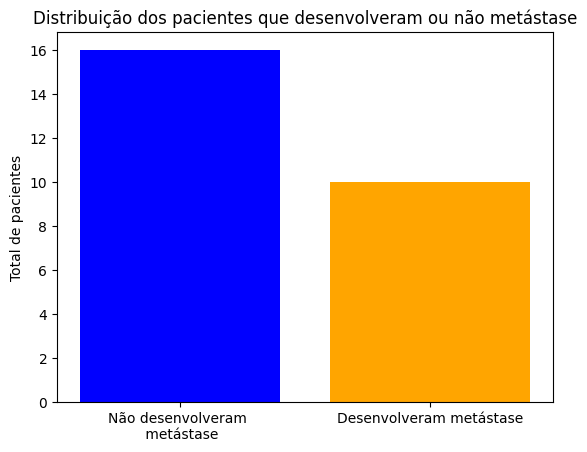

In [24]:
import matplotlib.pyplot as plt

plt.bar([0,1], y.value_counts().values, color=['blue', 'orange'])

# Adding labels and title
# plt.xlabel('Target Value')
plt.ylabel('Total de pacientes')
plt.title('Distribuição dos pacientes que desenvolveram ou não metástase')

# Adding tick labels
plt.xticks(ticks=[0,1], labels=['Não desenvolveram \n metástase', 
                                'Desenvolveram metástase'])
, 
# Display the plot
plt.show()

* Sabemos que as classes estão suficientemente balanceadas (60 - 40)

In [27]:
X_scaled.head()

,T2FS_original_shape_Elongation,T2FS_original_shape_Flatness,T2FS_original_shape_LeastAxisLength,T2FS_original_shape_MajorAxisLength,T2FS_original_shape_Maximum2DDiameterColumn,T2FS_original_shape_Maximum2DDiameterRow,T2FS_original_shape_Maximum2DDiameterSlice,T2FS_original_shape_Maximum3DDiameter,T2FS_original_shape_MeshVolume,T2FS_original_shape_MinorAxisLength,...,T1_wavelet-LLL_gldm_LargeDependenceLowGrayLevelEmphasis,T1_wavelet-LLL_gldm_LowGrayLevelEmphasis,T1_wavelet-LLL_gldm_SmallDependenceEmphasis,T1_wavelet-LLL_gldm_SmallDependenceHighGrayLevelEmphasis,T1_wavelet-LLL_gldm_SmallDependenceLowGrayLevelEmphasis,T1_wavelet-LLL_ngtdm_Busyness,T1_wavelet-LLL_ngtdm_Coarseness,T1_wavelet-LLL_ngtdm_Complexity,T1_wavelet-LLL_ngtdm_Contrast,T1_wavelet-LLL_ngtdm_Strength
0,0.812484,0.959733,0.406441,-0.388768,-0.258283,-0.444984,0.017922,-0.431288,-0.191439,0.072900,...,-0.454727,0.995497,-0.601455,-0.880625,1.146752,3.678971,-0.421090,-1.212157,-0.143475,-0.941269
1,-0.459492,-0.216749,0.665481,0.440081,0.758238,0.673099,0.157653,0.597676,0.315888,0.372076,...,1.365039,1.819256,-0.711860,-0.730683,0.148131,0.877312,-0.471340,-0.507190,-0.679698,-0.529871
2,-0.810629,-1.137798,-0.788742,0.047507,0.398019,0.370970,-0.472924,0.212995,-0.421569,-0.347459,...,-0.338686,-0.201670,-0.522101,-0.550803,-0.313196,-0.555824,-0.147688,-0.215784,-0.560810,0.005790
3,-1.209194,-0.792392,0.493420,0.822229,0.480002,-0.236985,1.206475,1.002488,0.208524,0.174515,...,1.534608,1.257531,-0.296837,-0.372074,0.180211,0.831231,-0.455625,-0.472984,-0.030492,-0.554852
4,-1.494061,-0.765756,3.008981,2.830913,3.011878,3.054054,1.534530,2.868925,4.138171,1.824051,...,-0.354734,-0.836018,-1.063113,-0.704841,-0.931187,1.013490,-0.607220,-0.460519,-0.851348,-0.741107


In [28]:
y.head()

,T1_LungMets
0,0
1,0
2,1
3,0
4,1


## Feature Selection and preparing final data for training and prediction

In [29]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

N_FEATURES = 150

X = SelectKBest(f_classif, k=N_FEATURES).fit_transform(X_scaled, y)
X.shape

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


(26, 150)

## Searching for best hyperparameters for the Multi-Layer Perceptron (MLP) Neural Network

In [30]:
from matplotlib import rcParams
from sklearn.model_selection import LeaveOneOut, KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import (
                            accuracy_score, 
                            precision_score, 
                            recall_score,
                            f1_score, 
                            roc_curve, 
                            auc, 
                            confusion_matrix, 
                            ConfusionMatrixDisplay
                            )


In [ ]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, accuracy_score, recall_score, precision_score

RANDOM_SEED=28

# Define a function to create your Keras model
def create_model(input_dim, hidden_units=128, dropout_rate=0.5, learning_rate=0.001):
    
    model = Sequential([
        Dense(hidden_units, activation='relu', input_dim=input_dim),
        Dropout(dropout_rate),
        Dense(hidden_units // 2, activation='relu'),
        Dropout(dropout_rate),
        Dense(hidden_units // 2, activation='relu'),
        Dropout(dropout_rate),
        Dense(1, activation='sigmoid')
    ])
    
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='binary_crossentropy',
                  metrics=[
                      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                      tf.keras.metrics.Recall(name='recall'),
                      tf.keras.metrics.Precision(name='precision')
                  ]
                 )
    
    return model

# Create a KerasClassifier for scikit-learn compatibility
model = KerasClassifier(build_fn=create_model, input_dim=N_FEATURES, verbose=0)

# Define the hyperparameter grid
param_grid = {
    'hidden_units': [64, 128, 256, 512],
    'dropout_rate': [0.4, 0.5, 0.6],
    'learning_rate': [0.001, 0.005, 0.01, 0.05, 0.1],
    'batch_size': [1, 2, 4, 8, 16], # 32
    'epochs': [100] # 50
}

# Define a custom scoring function that combines accuracy, precision, and recall
def custom_scorer(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    
    # You can assign weights to each metric as needed
    combined_score = 0.6 * accuracy + 0.15 * precision + 0.25 * recall
    
    return combined_score

# Create a scorer based on the custom scoring function
scoring = make_scorer(custom_scorer)

# Create a RandomizedSearchCV instance
random_search = RandomizedSearchCV(model, param_distributions=param_grid, scoring=scoring,
                                   n_iter=100, cv=3, verbose=2, random_state=RANDOM_SEED, refit=True)

# Fit the RandomizedSearchCV to your data
random_search.fit(X,y) # X_train, y_train

In [ ]:
# Print the best hyperparameters
print("Best Hyperparameters:", random_search.best_params_)

## Instantiating the architecture of the Multi-Layer Perceptron (MLP) Neural Network 

In [31]:
def mlp_model():
    
    # Defining the Sequential model
    model = Sequential([
        Dense(1024, activation='relu', input_dim=N_FEATURES),
        Dropout(0.6),
        
        Dense(1024 // 2, activation='relu'),
        Dropout(0.6),
        
        Dense(1024 // 4, activation='relu'),
        Dropout(0.6),
        
        Dense(1, activation='sigmoid')
    ])

    # Compiling the model
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                  loss='binary_crossentropy',
                  metrics=[
                      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                      tf.keras.metrics.Recall(name='recall'),
                      tf.keras.metrics.Precision(name='precision')
                  ]
                 )
    
    return model

# Train the model with early stopping to prevent overfitting 
# (does not work to LOOCV, only when we specify validation data)
# early_stopping = tf.keras.callbacks.EarlyStopping(
#     monitor='val_loss',
#     patience=10,  # You can adjust the patience as needed
#     restore_best_weights=True
# )

## Test: LOOCV

In [32]:
# Define the number of epochs
N_EPOCHS=150 #150
THRESHOLD_VAL=0.5
BATCH_SIZE=4 # 4

# Initialize lists to store predicted probabilities and binary predictions
probs_preds_list = []
binary_preds_list = []

# Initialize lists to store training history metrics for plotting
loss_list = []
accuracy_list = []
y_list = []

# Define the feature and label datasets
X = pd.DataFrame(X)
y = y

# 'val_accuracy', 'val_loss'

In [33]:
# Perform LOOCV
loo = LeaveOneOut()
for train_index, test_index in loo.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index] 
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Instantiate the model
    model = mlp_model()
    
    # Fit the model on the training data
    history = model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=N_EPOCHS, 
                        verbose=1) # callbacks=[early_stopping], use_multiprocessing=True

     # Evaluate the model on the test data and store predictions
    y_probs = model.predict(X_test)
    y_pred_binary = (y_probs >= THRESHOLD_VAL).astype(int)
    
    # Store predicted probabilities and binary predictions for this fold
    # along with it's true label
    probs_preds_list.append(y_probs[0][0])
    binary_preds_list.append(y_pred_binary[0][0])
    y_list.append(y_test.values[0][0])

    # Store the training history metrics for this fold
    loss_list.append(history.history['loss'])
    accuracy_list.append(history.history['accuracy'])



Epoch 1/150


2023-09-19 23:33:54.753603: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-09-19 23:33:54.753923: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-09-19 23:33:54.754032: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

7/7 [==============================] - 2s 5ms/step - loss: 9.3465 - accuracy: 0.6400 - recall: 0.3000 - precision: 0.6000     
Epoch 2/150
7/7 [==============================] - 0s 4ms/step - loss: 3.1059 - accuracy: 0.7200 - recall: 0.9000 - precision: 0.6000
Epoch 3/150
7/7 [==============================] - 0s 4ms/step - loss: 35.4628 - accuracy: 0.6800 - recall: 0.5000 - precision: 0.6250     
Epoch 4/150
7/7 [==============================] - 0s 4ms/step - loss: 30.0129 - accuracy: 0.6000 - recall: 0.4000 - precision: 0.5000
Epoch 5/150
7/7 [==============================] - 0s 3ms/step - loss: 23.6768 - accuracy: 0.5200 - recall: 0.9000 - precision: 0.4500
Epoch 6/150
7/7 [==============================] - 0s 4ms/step - loss: 37.6375 - accuracy: 0.7600 - recall: 0.4000 - precision: 1.0000
Epoch 7/150
7/7 [==============================] - 0s 3ms/step - loss: 14.6888 - accuracy: 0.8000 - recall: 0.9000 - precision: 0.6923
Epoch 8/150
7/7 [==============================] - 0s 4ms/s

7/7 [==============================] - 0s 3ms/step - loss: 0.6199 - accuracy: 0.9200 - recall: 0.9000 - precision: 0.9000        
Epoch 62/150
7/7 [==============================] - 0s 3ms/step - loss: 10.9892 - accuracy: 0.8000 - recall: 0.9000 - precision: 0.6923       
Epoch 63/150
7/7 [==============================] - 0s 3ms/step - loss: 19.2271 - accuracy: 0.8400 - recall: 0.8000 - precision: 0.8000
Epoch 64/150
7/7 [==============================] - 0s 3ms/step - loss: 17.3017 - accuracy: 0.9200 - recall: 0.8000 - precision: 1.0000
Epoch 65/150
7/7 [==============================] - 0s 3ms/step - loss: 32.4938 - accuracy: 0.8400 - recall: 1.0000 - precision: 0.7143       
Epoch 66/150
7/7 [==============================] - 0s 4ms/step - loss: 24.9547 - accuracy: 0.8800 - recall: 0.7000 - precision: 1.0000
Epoch 67/150
7/7 [==============================] - 0s 3ms/step - loss: 23.3534 - accuracy: 0.9200 - recall: 0.9000 - precision: 0.9000
Epoch 68/150
7/7 [======================

7/7 [==============================] - 0s 3ms/step - loss: 95.5021 - accuracy: 0.7600 - recall: 0.9000 - precision: 0.6429
Epoch 121/150
7/7 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 122/150
7/7 [==============================] - 0s 3ms/step - loss: 56.9686 - accuracy: 0.9200 - recall: 0.8000 - precision: 1.0000
Epoch 123/150
7/7 [==============================] - 0s 3ms/step - loss: 189.1360 - accuracy: 0.9200 - recall: 0.9000 - precision: 0.9000
Epoch 124/150
7/7 [==============================] - 0s 2ms/step - loss: 15.5431 - accuracy: 0.8800 - recall: 0.7000 - precision: 1.0000
Epoch 125/150
7/7 [==============================] - 0s 3ms/step - loss: 116.3211 - accuracy: 0.9600 - recall: 1.0000 - precision: 0.9091
Epoch 126/150
7/7 [==============================] - 0s 3ms/step - loss: 45.9661 - accuracy: 0.9600 - recall: 1.0000 - precision: 0.9091
Epoch 127/150
7/7 [==============================]

7/7 [==============================] - 0s 2ms/step - loss: 8.7585 - accuracy: 0.8400 - recall: 0.7000 - precision: 0.8750
Epoch 30/150
7/7 [==============================] - 0s 3ms/step - loss: 18.6567 - accuracy: 0.7600 - recall: 0.7000 - precision: 0.7000
Epoch 31/150
7/7 [==============================] - 0s 3ms/step - loss: 9.7495 - accuracy: 0.6800 - recall: 0.9000 - precision: 0.5625
Epoch 32/150
7/7 [==============================] - 0s 3ms/step - loss: 1.8167 - accuracy: 0.8800 - recall: 0.8000 - precision: 0.8889
Epoch 33/150
7/7 [==============================] - 0s 3ms/step - loss: 2.9916 - accuracy: 0.9200 - recall: 0.9000 - precision: 0.9000
Epoch 34/150
7/7 [==============================] - 0s 3ms/step - loss: 8.1506 - accuracy: 0.8800 - recall: 0.8000 - precision: 0.8889
Epoch 35/150
7/7 [==============================] - 0s 3ms/step - loss: 6.9996e-04 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 36/150
7/7 [==============================] - 0s 3ms/step

7/7 [==============================] - 0s 2ms/step - loss: 20.9528 - accuracy: 0.9200 - recall: 1.0000 - precision: 0.8333
Epoch 90/150
7/7 [==============================] - 0s 3ms/step - loss: 3.9212 - accuracy: 0.9600 - recall: 1.0000 - precision: 0.9091        
Epoch 91/150
7/7 [==============================] - 0s 3ms/step - loss: 1.1078 - accuracy: 0.9600 - recall: 1.0000 - precision: 0.9091        
Epoch 92/150
7/7 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000    
Epoch 93/150
7/7 [==============================] - 0s 2ms/step - loss: 4.5476 - accuracy: 0.8800 - recall: 0.8000 - precision: 0.8889
Epoch 94/150
7/7 [==============================] - 0s 3ms/step - loss: 24.6410 - accuracy: 0.8800 - recall: 0.8000 - precision: 0.8889       
Epoch 95/150
7/7 [==============================] - 0s 3ms/step - loss: 38.6355 - accuracy: 0.9600 - recall: 0.9000 - precision: 1.0000
Epoch 96/150
7/7 [================

7/7 [==============================] - 0s 3ms/step - loss: 10.5404 - accuracy: 0.9200 - recall: 0.9000 - precision: 0.9000
Epoch 149/150
7/7 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 150/150
1/1 [==============================] - 0s 40ms/step
Epoch 1/150
7/7 [==============================] - 1s 4ms/step - loss: 4.0205 - accuracy: 0.3600 - recall: 0.0000e+00 - precision: 0.0000e+00
Epoch 2/150
7/7 [==============================] - 0s 3ms/step - loss: 13.7125 - accuracy: 0.6800 - recall: 0.6667 - precision: 0.5455    
Epoch 3/150
7/7 [==============================] - 0s 5ms/step - loss: 38.9089 - accuracy: 0.4400 - recall: 0.3333 - precision: 0.2727        
Epoch 4/150
7/7 [==============================] - 0s 4ms/step - loss: 18.9017 - accuracy: 0.7200 - recall: 0.5556 - precision: 0.6250
Epoch 5/150
7/7 [==============================] - 0s 3ms/step - loss: 82.4818 - accuracy: 0.6000 - recall: 0.33

7/7 [==============================] - 0s 3ms/step - loss: 8.6899 - accuracy: 0.8400 - recall: 0.8889 - precision: 0.7273
Epoch 58/150
7/7 [==============================] - 0s 3ms/step - loss: 1.8397 - accuracy: 0.9200 - recall: 0.8889 - precision: 0.8889
Epoch 59/150
7/7 [==============================] - 0s 3ms/step - loss: 12.0331 - accuracy: 0.9200 - recall: 0.7778 - precision: 1.0000       
Epoch 60/150
7/7 [==============================] - 0s 2ms/step - loss: 7.1445 - accuracy: 0.8800 - recall: 0.7778 - precision: 0.8750
Epoch 61/150
7/7 [==============================] - 0s 2ms/step - loss: 32.6919 - accuracy: 0.7600 - recall: 0.8889 - precision: 0.6154
Epoch 62/150
7/7 [==============================] - 0s 2ms/step - loss: 5.8482 - accuracy: 0.9600 - recall: 1.0000 - precision: 0.9000
Epoch 63/150
7/7 [==============================] - 0s 3ms/step - loss: 17.5690 - accuracy: 0.8800 - recall: 0.6667 - precision: 1.0000
Epoch 64/150
7/7 [==============================] - 0s 2ms

7/7 [==============================] - 0s 3ms/step - loss: 6.5924 - accuracy: 0.9600 - recall: 1.0000 - precision: 0.9000        
Epoch 117/150
7/7 [==============================] - 0s 3ms/step - loss: 18.0797 - accuracy: 0.9200 - recall: 0.8889 - precision: 0.8889       
Epoch 118/150
7/7 [==============================] - 0s 3ms/step - loss: 17.9974 - accuracy: 0.9200 - recall: 0.8889 - precision: 0.8889
Epoch 119/150
7/7 [==============================] - 0s 3ms/step - loss: 4.7596 - accuracy: 0.9600 - recall: 1.0000 - precision: 0.9000
Epoch 120/150
7/7 [==============================] - 0s 3ms/step - loss: 1.4603 - accuracy: 0.9600 - recall: 1.0000 - precision: 0.9000
Epoch 121/150
7/7 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 122/150
7/7 [==============================] - 0s 4ms/step - loss: 16.0088 - accuracy: 0.8800 - recall: 0.7778 - precision: 0.8750
Epoch 123/150
7/7 [=====================

7/7 [==============================] - 0s 3ms/step - loss: 30.7214 - accuracy: 0.8000 - recall: 0.9000 - precision: 0.6923
Epoch 26/150
7/7 [==============================] - 0s 3ms/step - loss: 3.3319 - accuracy: 0.9200 - recall: 0.8000 - precision: 1.0000
Epoch 27/150
7/7 [==============================] - 0s 3ms/step - loss: 5.0343 - accuracy: 0.9600 - recall: 0.9000 - precision: 1.0000
Epoch 28/150
7/7 [==============================] - 0s 3ms/step - loss: 1.5595 - accuracy: 0.9200 - recall: 0.9000 - precision: 0.9000
Epoch 29/150
7/7 [==============================] - 0s 3ms/step - loss: 1.6516 - accuracy: 0.9200 - recall: 0.9000 - precision: 0.9000
Epoch 30/150
7/7 [==============================] - 0s 3ms/step - loss: 11.1051 - accuracy: 0.7600 - recall: 0.8000 - precision: 0.6667   
Epoch 31/150
7/7 [==============================] - 0s 3ms/step - loss: 0.1482 - accuracy: 0.9600 - recall: 1.0000 - precision: 0.9091
Epoch 32/150
7/7 [==============================] - 0s 3ms/step

7/7 [==============================] - 0s 3ms/step - loss: 38.7165 - accuracy: 0.9200 - recall: 0.9000 - precision: 0.9000
Epoch 86/150
7/7 [==============================] - 0s 3ms/step - loss: 49.1286 - accuracy: 0.9200 - recall: 0.9000 - precision: 0.9000
Epoch 87/150
7/7 [==============================] - 0s 3ms/step - loss: 13.9769 - accuracy: 0.9600 - recall: 1.0000 - precision: 0.9091
Epoch 88/150
7/7 [==============================] - 0s 2ms/step - loss: 9.5288 - accuracy: 0.9600 - recall: 1.0000 - precision: 0.9091
Epoch 89/150
7/7 [==============================] - 0s 3ms/step - loss: 235.7276 - accuracy: 0.8800 - recall: 0.7000 - precision: 1.0000
Epoch 90/150
7/7 [==============================] - 0s 3ms/step - loss: 45.2383 - accuracy: 0.9600 - recall: 0.9000 - precision: 1.0000       
Epoch 91/150
7/7 [==============================] - 0s 3ms/step - loss: 29.5163 - accuracy: 0.9600 - recall: 0.9000 - precision: 1.0000       
Epoch 92/150
7/7 [=============================

7/7 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 145/150
7/7 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 146/150
7/7 [==============================] - 0s 3ms/step - loss: 5.9278 - accuracy: 0.9600 - recall: 1.0000 - precision: 0.9091
Epoch 147/150
7/7 [==============================] - 0s 2ms/step - loss: 1.6943 - accuracy: 0.9600 - recall: 1.0000 - precision: 0.9091        
Epoch 148/150
7/7 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 149/150
7/7 [==============================] - 0s 3ms/step - loss: 59.0544 - accuracy: 0.9200 - recall: 0.9000 - precision: 0.9000
Epoch 150/150
1/1 [==============================] - 0s 38ms/step
Epoch 1/150
7/7 [==============================] - 1s 3ms/step - loss: 4.8294 - accuracy: 0.6000 - recall: 0.44

7/7 [==============================] - 0s 3ms/step - loss: 5.9517 - accuracy: 0.8800 - recall: 0.7778 - precision: 0.8750    
Epoch 54/150
7/7 [==============================] - 0s 3ms/step - loss: 0.3831 - accuracy: 0.9600 - recall: 1.0000 - precision: 0.9000
Epoch 55/150
7/7 [==============================] - 0s 3ms/step - loss: 0.0124 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 56/150
7/7 [==============================] - 0s 3ms/step - loss: 3.1738 - accuracy: 0.9200 - recall: 1.0000 - precision: 0.8182     
Epoch 57/150
7/7 [==============================] - 0s 3ms/step - loss: 2.8662 - accuracy: 0.8800 - recall: 0.7778 - precision: 0.8750
Epoch 58/150
7/7 [==============================] - 0s 3ms/step - loss: 3.3027 - accuracy: 0.9600 - recall: 0.8889 - precision: 1.0000
Epoch 59/150
7/7 [==============================] - 0s 2ms/step - loss: 7.2297 - accuracy: 0.8800 - recall: 0.8889 - precision: 0.8000
Epoch 60/150
7/7 [==============================] - 0s 3ms/

7/7 [==============================] - 0s 3ms/step - loss: 109.6426 - accuracy: 0.9200 - recall: 0.8889 - precision: 0.8889
Epoch 113/150
7/7 [==============================] - 0s 3ms/step - loss: 103.2874 - accuracy: 0.8800 - recall: 0.7778 - precision: 0.8750      
Epoch 114/150
7/7 [==============================] - 0s 3ms/step - loss: 53.2995 - accuracy: 0.8800 - recall: 0.7778 - precision: 0.8750
Epoch 115/150
7/7 [==============================] - 0s 3ms/step - loss: 4.4481 - accuracy: 0.9600 - recall: 1.0000 - precision: 0.9000
Epoch 116/150
7/7 [==============================] - 0s 3ms/step - loss: 36.7284 - accuracy: 0.9600 - recall: 0.8889 - precision: 1.0000
Epoch 117/150
7/7 [==============================] - 0s 3ms/step - loss: 2.9226 - accuracy: 0.9200 - recall: 0.7778 - precision: 1.0000
Epoch 118/150
7/7 [==============================] - 0s 3ms/step - loss: 1023.6473 - accuracy: 0.8400 - recall: 0.6667 - precision: 0.8571   
Epoch 119/150
7/7 [=========================

7/7 [==============================] - 0s 2ms/step - loss: 3.9159 - accuracy: 0.8400 - recall: 0.9000 - precision: 0.7500
Epoch 17/150
7/7 [==============================] - 0s 3ms/step - loss: 16.1445 - accuracy: 0.7600 - recall: 0.7000 - precision: 0.7000    
Epoch 18/150
7/7 [==============================] - 0s 2ms/step - loss: 10.4388 - accuracy: 0.8800 - recall: 0.8000 - precision: 0.8889
Epoch 19/150
7/7 [==============================] - 0s 3ms/step - loss: 13.4393 - accuracy: 0.7600 - recall: 1.0000 - precision: 0.6250
Epoch 20/150
7/7 [==============================] - 0s 3ms/step - loss: 17.2953 - accuracy: 0.7200 - recall: 0.8000 - precision: 0.6154
Epoch 21/150
7/7 [==============================] - 0s 4ms/step - loss: 11.3044 - accuracy: 0.8800 - recall: 0.7000 - precision: 1.0000
Epoch 22/150
7/7 [==============================] - 0s 3ms/step - loss: 4.4947 - accuracy: 0.9200 - recall: 0.9000 - precision: 0.9000
Epoch 23/150
7/7 [==============================] - 0s 3ms/

7/7 [==============================] - 0s 3ms/step - loss: 19.0478 - accuracy: 0.9200 - recall: 0.9000 - precision: 0.9000
Epoch 77/150
7/7 [==============================] - 0s 3ms/step - loss: 13.1028 - accuracy: 0.8000 - recall: 0.9000 - precision: 0.6923
Epoch 78/150
7/7 [==============================] - 0s 3ms/step - loss: 2.4106e-07 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 79/150
7/7 [==============================] - 0s 3ms/step - loss: 7.9088 - accuracy: 0.8800 - recall: 0.8000 - precision: 0.8889        
Epoch 80/150
7/7 [==============================] - 0s 3ms/step - loss: 16.7077 - accuracy: 0.8400 - recall: 0.8000 - precision: 0.8000
Epoch 81/150
7/7 [==============================] - 0s 3ms/step - loss: 1.7539 - accuracy: 0.8800 - recall: 0.9000 - precision: 0.8182
Epoch 82/150
7/7 [==============================] - 0s 3ms/step - loss: 3.5453 - accuracy: 0.9600 - recall: 1.0000 - precision: 0.9091
Epoch 83/150
7/7 [==============================] - 0

7/7 [==============================] - 0s 3ms/step - loss: 279.8417 - accuracy: 0.8800 - recall: 0.7000 - precision: 1.0000
Epoch 136/150
7/7 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 137/150
7/7 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 138/150
7/7 [==============================] - 0s 3ms/step - loss: 156.1243 - accuracy: 0.8400 - recall: 0.9000 - precision: 0.7500    
Epoch 139/150
7/7 [==============================] - 0s 3ms/step - loss: 0.7541 - accuracy: 0.9600 - recall: 1.0000 - precision: 0.9091        
Epoch 140/150
7/7 [==============================] - 0s 3ms/step - loss: 66.6621 - accuracy: 0.9200 - recall: 0.9000 - precision: 0.9000     
Epoch 141/150
7/7 [==============================] - 0s 3ms/step - loss: 15.9037 - accuracy: 0.9600 - recall: 0.9000 - precision: 1.0000
Epoch 142/150
7/7 [============

7/7 [==============================] - 0s 3ms/step - loss: 5.8962 - accuracy: 0.9200 - recall: 0.8000 - precision: 1.0000
Epoch 40/150
7/7 [==============================] - 0s 3ms/step - loss: 5.8966 - accuracy: 0.9600 - recall: 1.0000 - precision: 0.9091
Epoch 41/150
7/7 [==============================] - 0s 3ms/step - loss: 1.4873 - accuracy: 0.9600 - recall: 0.9000 - precision: 1.0000        
Epoch 42/150
7/7 [==============================] - 0s 2ms/step - loss: 17.0561 - accuracy: 0.8800 - recall: 1.0000 - precision: 0.7692
Epoch 43/150
7/7 [==============================] - 0s 3ms/step - loss: 9.3547 - accuracy: 0.8800 - recall: 1.0000 - precision: 0.7692
Epoch 44/150
7/7 [==============================] - 0s 3ms/step - loss: 12.5162 - accuracy: 0.8800 - recall: 0.7000 - precision: 1.0000    
Epoch 45/150
7/7 [==============================] - 0s 3ms/step - loss: 19.2803 - accuracy: 0.9200 - recall: 0.9000 - precision: 0.9000
Epoch 46/150
7/7 [==============================] - 0

7/7 [==============================] - 0s 3ms/step - loss: 32.3392 - accuracy: 0.9200 - recall: 0.8000 - precision: 1.0000
Epoch 100/150
7/7 [==============================] - 0s 3ms/step - loss: 592.4854 - accuracy: 0.8000 - recall: 0.8000 - precision: 0.7273
Epoch 101/150
7/7 [==============================] - 0s 2ms/step - loss: 190.2730 - accuracy: 0.8800 - recall: 0.9000 - precision: 0.8182      
Epoch 102/150
7/7 [==============================] - 0s 3ms/step - loss: 265.4350 - accuracy: 0.8000 - recall: 0.7000 - precision: 0.7778
Epoch 103/150
7/7 [==============================] - 0s 3ms/step - loss: 30.4936 - accuracy: 0.8800 - recall: 0.8000 - precision: 0.8889
Epoch 104/150
7/7 [==============================] - 0s 3ms/step - loss: 52.7870 - accuracy: 0.8000 - recall: 0.7000 - precision: 0.7778
Epoch 105/150
7/7 [==============================] - 0s 2ms/step - loss: 77.3358 - accuracy: 0.8000 - recall: 0.9000 - precision: 0.6923
Epoch 106/150
7/7 [===========================

7/7 [==============================] - 0s 3ms/step - loss: 18.8071 - accuracy: 0.5600 - recall: 0.6667 - precision: 0.4286    
Epoch 8/150
7/7 [==============================] - 0s 3ms/step - loss: 9.1278 - accuracy: 0.8800 - recall: 0.7778 - precision: 0.8750
Epoch 9/150
7/7 [==============================] - 0s 3ms/step - loss: 19.8910 - accuracy: 0.8400 - recall: 0.7778 - precision: 0.7778
Epoch 10/150
7/7 [==============================] - 0s 3ms/step - loss: 10.9478 - accuracy: 0.8400 - recall: 0.6667 - precision: 0.8571    
Epoch 11/150
7/7 [==============================] - 0s 3ms/step - loss: 26.5076 - accuracy: 0.7200 - recall: 1.0000 - precision: 0.5625   
Epoch 12/150
7/7 [==============================] - 0s 3ms/step - loss: 60.1016 - accuracy: 0.7600 - recall: 0.4444 - precision: 0.8000
Epoch 13/150
7/7 [==============================] - 0s 3ms/step - loss: 18.8608 - accuracy: 0.7200 - recall: 0.8889 - precision: 0.5714
Epoch 14/150
7/7 [==============================] - 0

7/7 [==============================] - 0s 3ms/step - loss: 2.0325 - accuracy: 0.9600 - recall: 1.0000 - precision: 0.9000
Epoch 67/150
7/7 [==============================] - 0s 3ms/step - loss: 11.4086 - accuracy: 0.8400 - recall: 0.8889 - precision: 0.7273   
Epoch 68/150
7/7 [==============================] - 0s 3ms/step - loss: 19.4419 - accuracy: 0.9200 - recall: 0.7778 - precision: 1.0000       
Epoch 69/150
7/7 [==============================] - 0s 3ms/step - loss: 50.0836 - accuracy: 0.8800 - recall: 0.7778 - precision: 0.8750
Epoch 70/150
7/7 [==============================] - 0s 3ms/step - loss: 1.8113 - accuracy: 0.9200 - recall: 1.0000 - precision: 0.8182
Epoch 71/150
7/7 [==============================] - 0s 3ms/step - loss: 1.7983 - accuracy: 0.9600 - recall: 0.8889 - precision: 1.0000     
Epoch 72/150
7/7 [==============================] - 0s 3ms/step - loss: 9.8264 - accuracy: 0.9200 - recall: 0.8889 - precision: 0.8889    
Epoch 73/150
7/7 [============================

7/7 [==============================] - 0s 2ms/step - loss: 4.7947 - accuracy: 0.9600 - recall: 1.0000 - precision: 0.9000
Epoch 126/150
7/7 [==============================] - 0s 3ms/step - loss: 114.5829 - accuracy: 0.9600 - recall: 1.0000 - precision: 0.9000
Epoch 127/150
7/7 [==============================] - 0s 3ms/step - loss: 24.3940 - accuracy: 0.9600 - recall: 0.8889 - precision: 1.0000
Epoch 128/150
7/7 [==============================] - 0s 3ms/step - loss: 66.2009 - accuracy: 0.9200 - recall: 0.8889 - precision: 0.8889
Epoch 129/150
7/7 [==============================] - 0s 2ms/step - loss: 231.3284 - accuracy: 0.8800 - recall: 0.8889 - precision: 0.8000
Epoch 130/150
7/7 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 131/150
7/7 [==============================] - 0s 3ms/step - loss: 16.6028 - accuracy: 0.9600 - recall: 0.8889 - precision: 1.0000
Epoch 132/150
7/7 [==============================] 

7/7 [==============================] - 0s 2ms/step - loss: 3.7068 - accuracy: 0.9200 - recall: 0.8889 - precision: 0.8889        
Epoch 35/150
7/7 [==============================] - 0s 3ms/step - loss: 9.3123 - accuracy: 0.9200 - recall: 1.0000 - precision: 0.8182
Epoch 36/150
7/7 [==============================] - 0s 3ms/step - loss: 49.6417 - accuracy: 0.9200 - recall: 0.7778 - precision: 1.0000    
Epoch 37/150
7/7 [==============================] - 0s 3ms/step - loss: 17.0113 - accuracy: 0.9200 - recall: 0.7778 - precision: 1.0000
Epoch 38/150
7/7 [==============================] - 0s 3ms/step - loss: 19.9972 - accuracy: 0.9200 - recall: 0.7778 - precision: 1.0000       
Epoch 39/150
7/7 [==============================] - 0s 2ms/step - loss: 38.3235 - accuracy: 0.8800 - recall: 1.0000 - precision: 0.7500
Epoch 40/150
7/7 [==============================] - 0s 2ms/step - loss: 11.7571 - accuracy: 0.9600 - recall: 0.8889 - precision: 1.0000
Epoch 41/150
7/7 [==========================

7/7 [==============================] - 0s 3ms/step - loss: 46.9597 - accuracy: 0.8800 - recall: 0.7778 - precision: 0.8750
Epoch 94/150
7/7 [==============================] - 0s 3ms/step - loss: 10.6228 - accuracy: 0.9200 - recall: 1.0000 - precision: 0.8182
Epoch 95/150
7/7 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 96/150
7/7 [==============================] - 0s 2ms/step - loss: 151.5697 - accuracy: 0.9200 - recall: 0.7778 - precision: 1.0000
Epoch 97/150
7/7 [==============================] - 0s 3ms/step - loss: 37.2529 - accuracy: 0.8800 - recall: 0.7778 - precision: 0.8750
Epoch 98/150
7/7 [==============================] - 0s 2ms/step - loss: 9.3874 - accuracy: 0.9600 - recall: 1.0000 - precision: 0.9000
Epoch 99/150
7/7 [==============================] - 0s 2ms/step - loss: 7.3952 - accuracy: 0.9600 - recall: 1.0000 - precision: 0.9000
Epoch 100/150
7/7 [==============================] - 0s 2ms

7/7 [==============================] - 1s 3ms/step - loss: 3.0960 - accuracy: 0.5200 - recall: 0.6000 - precision: 0.4286
Epoch 2/150
7/7 [==============================] - 0s 3ms/step - loss: 43.2315 - accuracy: 0.6400 - recall: 0.2000 - precision: 0.6667   
Epoch 3/150
7/7 [==============================] - 0s 3ms/step - loss: 10.6318 - accuracy: 0.6400 - recall: 0.7000 - precision: 0.5385
Epoch 4/150
7/7 [==============================] - 0s 3ms/step - loss: 15.8261 - accuracy: 0.5600 - recall: 0.4000 - precision: 0.4444
Epoch 5/150
7/7 [==============================] - 0s 3ms/step - loss: 11.5426 - accuracy: 0.5200 - recall: 0.5000 - precision: 0.4167
Epoch 6/150
7/7 [==============================] - 0s 3ms/step - loss: 6.2666 - accuracy: 0.7200 - recall: 0.5000 - precision: 0.7143     
Epoch 7/150
7/7 [==============================] - 0s 3ms/step - loss: 7.1837 - accuracy: 0.8000 - recall: 0.7000 - precision: 0.7778
Epoch 8/150
7/7 [==============================] - 0s 3ms/step

7/7 [==============================] - 0s 3ms/step - loss: 53.7845 - accuracy: 0.7200 - recall: 0.8000 - precision: 0.6154
Epoch 62/150
7/7 [==============================] - 0s 3ms/step - loss: 80.2892 - accuracy: 0.8800 - recall: 1.0000 - precision: 0.7692
Epoch 63/150
7/7 [==============================] - 0s 3ms/step - loss: 39.8612 - accuracy: 0.9200 - recall: 0.8000 - precision: 1.0000
Epoch 64/150
7/7 [==============================] - 0s 2ms/step - loss: 99.6048 - accuracy: 0.8000 - recall: 0.6000 - precision: 0.8571   
Epoch 65/150
7/7 [==============================] - 0s 3ms/step - loss: 10.6046 - accuracy: 0.8400 - recall: 1.0000 - precision: 0.7143
Epoch 66/150
7/7 [==============================] - 0s 2ms/step - loss: 60.7169 - accuracy: 0.8000 - recall: 0.8000 - precision: 0.7273
Epoch 67/150
7/7 [==============================] - 0s 3ms/step - loss: 24.9180 - accuracy: 0.9200 - recall: 0.9000 - precision: 0.9000
Epoch 68/150
7/7 [==============================] - 0s 3ms

7/7 [==============================] - 0s 3ms/step - loss: 36.6574 - accuracy: 0.9600 - recall: 1.0000 - precision: 0.9091
Epoch 121/150
7/7 [==============================] - 0s 3ms/step - loss: 15.8536 - accuracy: 0.9600 - recall: 1.0000 - precision: 0.9091
Epoch 122/150
7/7 [==============================] - 0s 2ms/step - loss: 24.5338 - accuracy: 0.9200 - recall: 0.8000 - precision: 1.0000
Epoch 123/150
7/7 [==============================] - 0s 2ms/step - loss: 127.9530 - accuracy: 0.9200 - recall: 0.8000 - precision: 1.0000
Epoch 124/150
7/7 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 125/150
7/7 [==============================] - 0s 3ms/step - loss: 42.9384 - accuracy: 0.9200 - recall: 1.0000 - precision: 0.8333
Epoch 126/150
7/7 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 127/150
7/7 [=============================

7/7 [==============================] - 0s 2ms/step - loss: 39.9727 - accuracy: 0.8800 - recall: 0.8889 - precision: 0.8000    
Epoch 30/150
7/7 [==============================] - 0s 3ms/step - loss: 10.9665 - accuracy: 0.8400 - recall: 0.6667 - precision: 0.8571
Epoch 31/150
7/7 [==============================] - 0s 3ms/step - loss: 16.2717 - accuracy: 0.7200 - recall: 0.7778 - precision: 0.5833
Epoch 32/150
7/7 [==============================] - 0s 3ms/step - loss: 8.3431 - accuracy: 0.8000 - recall: 0.6667 - precision: 0.7500
Epoch 33/150
7/7 [==============================] - 0s 2ms/step - loss: 18.6402 - accuracy: 0.9200 - recall: 0.7778 - precision: 1.0000
Epoch 34/150
7/7 [==============================] - 0s 3ms/step - loss: 12.2559 - accuracy: 0.8800 - recall: 1.0000 - precision: 0.7500
Epoch 35/150
7/7 [==============================] - 0s 3ms/step - loss: 15.7807 - accuracy: 0.8000 - recall: 0.6667 - precision: 0.7500    
Epoch 36/150
7/7 [==============================] - 0s

7/7 [==============================] - 0s 3ms/step - loss: 512.3868 - accuracy: 0.8800 - recall: 0.8889 - precision: 0.8000
Epoch 90/150
7/7 [==============================] - 0s 3ms/step - loss: 5.3189 - accuracy: 0.9600 - recall: 1.0000 - precision: 0.9000
Epoch 91/150
7/7 [==============================] - 0s 3ms/step - loss: 71.9662 - accuracy: 0.9600 - recall: 0.8889 - precision: 1.0000
Epoch 92/150
7/7 [==============================] - 0s 3ms/step - loss: 67.1070 - accuracy: 0.8800 - recall: 0.7778 - precision: 0.8750       
Epoch 93/150
7/7 [==============================] - 0s 3ms/step - loss: 140.0597 - accuracy: 0.8400 - recall: 0.8889 - precision: 0.7273
Epoch 94/150
7/7 [==============================] - 0s 3ms/step - loss: 368.9127 - accuracy: 0.8800 - recall: 0.7778 - precision: 0.8750      
Epoch 95/150
7/7 [==============================] - 0s 3ms/step - loss: 12.0284 - accuracy: 0.9600 - recall: 1.0000 - precision: 0.9000
Epoch 96/150
7/7 [============================

7/7 [==============================] - 0s 3ms/step - loss: 5.1647 - accuracy: 0.9600 - recall: 0.8889 - precision: 1.0000        
Epoch 149/150
7/7 [==============================] - 0s 3ms/step - loss: 72.7684 - accuracy: 0.9600 - recall: 0.8889 - precision: 1.0000
Epoch 150/150
1/1 [==============================] - 0s 40ms/step
Epoch 1/150
7/7 [==============================] - 1s 3ms/step - loss: 14.8341 - accuracy: 0.5200 - recall: 0.1000 - precision: 0.2500   
Epoch 2/150
7/7 [==============================] - 0s 3ms/step - loss: 14.6776 - accuracy: 0.6800 - recall: 0.8000 - precision: 0.5714
Epoch 3/150
7/7 [==============================] - 0s 3ms/step - loss: 14.6051 - accuracy: 0.6800 - recall: 0.6000 - precision: 0.6000
Epoch 4/150
7/7 [==============================] - 0s 3ms/step - loss: 32.2335 - accuracy: 0.4400 - recall: 0.4000 - precision: 0.3333
Epoch 5/150
7/7 [==============================] - 0s 3ms/step - loss: 9.0005 - accuracy: 0.8400 - recall: 0.8000 - precisio

7/7 [==============================] - 0s 3ms/step - loss: 2.2209 - accuracy: 0.9600 - recall: 1.0000 - precision: 0.9091        
Epoch 58/150
7/7 [==============================] - 0s 2ms/step - loss: 69.1755 - accuracy: 0.8800 - recall: 0.7000 - precision: 1.0000     
Epoch 59/150
7/7 [==============================] - 0s 3ms/step - loss: 5.2299e-08 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 60/150
7/7 [==============================] - 0s 3ms/step - loss: 7.4703 - accuracy: 0.9600 - recall: 1.0000 - precision: 0.9091
Epoch 61/150
7/7 [==============================] - 0s 4ms/step - loss: 28.9646 - accuracy: 0.9200 - recall: 0.9000 - precision: 0.9000
Epoch 62/150
7/7 [==============================] - 0s 4ms/step - loss: 1.2343e-32 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 63/150
7/7 [==============================] - 0s 4ms/step - loss: 11.8271 - accuracy: 0.9200 - recall: 0.9000 - precision: 0.9000
Epoch 64/150
7/7 [==========================

7/7 [==============================] - 0s 3ms/step - loss: 52.4681 - accuracy: 0.9600 - recall: 1.0000 - precision: 0.9091
Epoch 117/150
7/7 [==============================] - 0s 3ms/step - loss: 53.3878 - accuracy: 0.9600 - recall: 0.9000 - precision: 1.0000
Epoch 118/150
7/7 [==============================] - 0s 3ms/step - loss: 2.2226e-18 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 119/150
7/7 [==============================] - 0s 3ms/step - loss: 21.2967 - accuracy: 0.9600 - recall: 0.9000 - precision: 1.0000     
Epoch 120/150
7/7 [==============================] - 0s 3ms/step - loss: 452.6054 - accuracy: 0.9200 - recall: 0.9000 - precision: 0.9000      
Epoch 121/150
7/7 [==============================] - 0s 3ms/step - loss: 256.0972 - accuracy: 0.8800 - recall: 1.0000 - precision: 0.7692
Epoch 122/150
7/7 [==============================] - 0s 3ms/step - loss: 77.3897 - accuracy: 0.9200 - recall: 0.9000 - precision: 0.9000
Epoch 123/150
7/7 [====================

7/7 [==============================] - 0s 3ms/step - loss: 9.8066 - accuracy: 0.7600 - recall: 0.8889 - precision: 0.6154    
Epoch 26/150
7/7 [==============================] - 0s 3ms/step - loss: 10.7871 - accuracy: 0.8000 - recall: 0.7778 - precision: 0.7000
Epoch 27/150
7/7 [==============================] - 0s 3ms/step - loss: 7.1941 - accuracy: 0.9200 - recall: 0.7778 - precision: 1.0000
Epoch 28/150
7/7 [==============================] - 0s 3ms/step - loss: 13.0277 - accuracy: 0.8400 - recall: 0.7778 - precision: 0.7778
Epoch 29/150
7/7 [==============================] - 0s 3ms/step - loss: 14.6259 - accuracy: 0.7600 - recall: 0.6667 - precision: 0.6667    
Epoch 30/150
7/7 [==============================] - 0s 3ms/step - loss: 0.5304 - accuracy: 0.9200 - recall: 1.0000 - precision: 0.8182
Epoch 31/150
7/7 [==============================] - 0s 3ms/step - loss: 51.7466 - accuracy: 0.8800 - recall: 0.6667 - precision: 1.0000
Epoch 32/150
7/7 [==============================] - 0s 3

7/7 [==============================] - 0s 3ms/step - loss: 0.2894 - accuracy: 0.9600 - recall: 1.0000 - precision: 0.9000
Epoch 85/150
7/7 [==============================] - 0s 3ms/step - loss: 10.9449 - accuracy: 0.9200 - recall: 1.0000 - precision: 0.8182
Epoch 86/150
7/7 [==============================] - 0s 3ms/step - loss: 19.1050 - accuracy: 0.9200 - recall: 0.8889 - precision: 0.8889
Epoch 87/150
7/7 [==============================] - 0s 3ms/step - loss: 39.3853 - accuracy: 0.9200 - recall: 0.8889 - precision: 0.8889
Epoch 88/150
7/7 [==============================] - 0s 3ms/step - loss: 6.5680 - accuracy: 0.9600 - recall: 1.0000 - precision: 0.9000
Epoch 89/150
7/7 [==============================] - 0s 3ms/step - loss: 27.4046 - accuracy: 0.9200 - recall: 0.7778 - precision: 1.0000
Epoch 90/150
7/7 [==============================] - 0s 3ms/step - loss: 3.3299 - accuracy: 0.9600 - recall: 1.0000 - precision: 0.9000        
Epoch 91/150
7/7 [==============================] - 0s 3

7/7 [==============================] - 0s 3ms/step - loss: 9.7614 - accuracy: 0.9600 - recall: 1.0000 - precision: 0.9000     
Epoch 144/150
7/7 [==============================] - 0s 3ms/step - loss: 62.9916 - accuracy: 0.8800 - recall: 0.8889 - precision: 0.8000
Epoch 145/150
7/7 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 146/150
7/7 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 147/150
7/7 [==============================] - 0s 3ms/step - loss: 13.8781 - accuracy: 0.9600 - recall: 1.0000 - precision: 0.9000
Epoch 148/150
7/7 [==============================] - 0s 3ms/step - loss: 65.3671 - accuracy: 0.9600 - recall: 0.8889 - precision: 1.0000
Epoch 149/150
7/7 [==============================] - 0s 3ms/step - loss: 5.3579 - accuracy: 0.9600 - recall: 1.0000 - precision: 0.9000
Epoch 150/150
1/1 [===========================

7/7 [==============================] - 0s 3ms/step - loss: 37.5116 - accuracy: 0.8000 - recall: 0.6667 - precision: 0.7500
Epoch 53/150
7/7 [==============================] - 0s 3ms/step - loss: 53.6596 - accuracy: 0.8000 - recall: 0.8889 - precision: 0.6667
Epoch 54/150
7/7 [==============================] - 0s 3ms/step - loss: 41.1404 - accuracy: 0.8000 - recall: 0.6667 - precision: 0.7500    
Epoch 55/150
7/7 [==============================] - 0s 3ms/step - loss: 12.8427 - accuracy: 0.8800 - recall: 0.8889 - precision: 0.8000       
Epoch 56/150
7/7 [==============================] - 0s 3ms/step - loss: 11.8518 - accuracy: 0.8000 - recall: 0.7778 - precision: 0.7000
Epoch 57/150
7/7 [==============================] - 0s 3ms/step - loss: 95.4236 - accuracy: 0.7600 - recall: 0.3333 - precision: 1.0000
Epoch 58/150
7/7 [==============================] - 0s 3ms/step - loss: 39.2490 - accuracy: 0.8400 - recall: 0.7778 - precision: 0.7778
Epoch 59/150
7/7 [==============================] 

7/7 [==============================] - 0s 4ms/step - loss: 45.8342 - accuracy: 0.9200 - recall: 0.7778 - precision: 1.0000
Epoch 112/150
7/7 [==============================] - 0s 3ms/step - loss: 57.7034 - accuracy: 0.8800 - recall: 1.0000 - precision: 0.7500
Epoch 113/150
7/7 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 114/150
7/7 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 115/150
7/7 [==============================] - 0s 3ms/step - loss: 18.8128 - accuracy: 0.9600 - recall: 1.0000 - precision: 0.9000
Epoch 116/150
7/7 [==============================] - 0s 3ms/step - loss: 3.3832 - accuracy: 0.9600 - recall: 1.0000 - precision: 0.9000        
Epoch 117/150
7/7 [==============================] - 0s 4ms/step - loss: 225.1994 - accuracy: 0.9200 - recall: 0.7778 - precision: 1.0000
Epoch 118/150
7/7 [======================

7/7 [==============================] - 0s 3ms/step - loss: 17.0473 - accuracy: 0.8400 - recall: 0.7778 - precision: 0.7778
Epoch 21/150
7/7 [==============================] - 0s 3ms/step - loss: 11.5730 - accuracy: 0.8400 - recall: 0.6667 - precision: 0.8571    
Epoch 22/150
7/7 [==============================] - 0s 3ms/step - loss: 13.5168 - accuracy: 0.6800 - recall: 0.7778 - precision: 0.5385       
Epoch 23/150
7/7 [==============================] - 0s 3ms/step - loss: 7.5148 - accuracy: 0.8000 - recall: 0.7778 - precision: 0.7000
Epoch 24/150
7/7 [==============================] - 0s 4ms/step - loss: 15.1290 - accuracy: 0.8000 - recall: 0.6667 - precision: 0.7500   
Epoch 25/150
7/7 [==============================] - 0s 3ms/step - loss: 4.1104 - accuracy: 0.8400 - recall: 0.8889 - precision: 0.7273
Epoch 26/150
7/7 [==============================] - 0s 3ms/step - loss: 12.6524 - accuracy: 0.8400 - recall: 0.6667 - precision: 0.8571   
Epoch 27/150
7/7 [============================

7/7 [==============================] - 0s 3ms/step - loss: 20.1543 - accuracy: 0.9600 - recall: 1.0000 - precision: 0.9000
Epoch 80/150
7/7 [==============================] - 0s 3ms/step - loss: 47.6051 - accuracy: 0.8000 - recall: 0.6667 - precision: 0.7500     
Epoch 81/150
7/7 [==============================] - 0s 3ms/step - loss: 14.9032 - accuracy: 0.9200 - recall: 0.8889 - precision: 0.8889
Epoch 82/150
7/7 [==============================] - 0s 3ms/step - loss: 11.3155 - accuracy: 0.9600 - recall: 0.8889 - precision: 1.0000
Epoch 83/150
7/7 [==============================] - 0s 3ms/step - loss: 15.8840 - accuracy: 0.9200 - recall: 1.0000 - precision: 0.8182
Epoch 84/150
7/7 [==============================] - 0s 3ms/step - loss: 33.5100 - accuracy: 0.8800 - recall: 0.8889 - precision: 0.8000
Epoch 85/150
7/7 [==============================] - 0s 3ms/step - loss: 67.1642 - accuracy: 0.8800 - recall: 0.8889 - precision: 0.8000
Epoch 86/150
7/7 [==============================] - 0s 3

7/7 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 139/150
7/7 [==============================] - 0s 3ms/step - loss: 65.6476 - accuracy: 0.9600 - recall: 1.0000 - precision: 0.9000       
Epoch 140/150
7/7 [==============================] - 0s 3ms/step - loss: 9.4882 - accuracy: 0.9200 - recall: 0.8889 - precision: 0.8889
Epoch 141/150
7/7 [==============================] - 0s 3ms/step - loss: 112.1003 - accuracy: 0.8800 - recall: 0.7778 - precision: 0.8750
Epoch 142/150
7/7 [==============================] - 0s 2ms/step - loss: 4.8673 - accuracy: 0.9600 - recall: 0.8889 - precision: 1.0000        
Epoch 143/150
7/7 [==============================] - 0s 3ms/step - loss: 6.0413 - accuracy: 0.9600 - recall: 1.0000 - precision: 0.9000
Epoch 144/150
7/7 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 145/150
7/7 [=================

7/7 [==============================] - 0s 3ms/step - loss: 6.7139 - accuracy: 0.8800 - recall: 0.7000 - precision: 1.0000
Epoch 48/150
7/7 [==============================] - 0s 3ms/step - loss: 4.8051 - accuracy: 0.9600 - recall: 1.0000 - precision: 0.9091
Epoch 49/150
7/7 [==============================] - 0s 3ms/step - loss: 3.1894 - accuracy: 0.9200 - recall: 1.0000 - precision: 0.8333
Epoch 50/150
7/7 [==============================] - 0s 3ms/step - loss: 4.1669e-04 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 51/150
7/7 [==============================] - 0s 3ms/step - loss: 1.3737e-14 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 52/150
7/7 [==============================] - 0s 3ms/step - loss: 2.0622 - accuracy: 0.9200 - recall: 0.8000 - precision: 1.0000
Epoch 53/150
7/7 [==============================] - 0s 3ms/step - loss: 7.3124 - accuracy: 0.8800 - recall: 0.8000 - precision: 0.8889     
Epoch 54/150
7/7 [==============================] - 0s 

7/7 [==============================] - 0s 3ms/step - loss: 167.3015 - accuracy: 0.9600 - recall: 0.9000 - precision: 1.0000
Epoch 107/150
7/7 [==============================] - 0s 3ms/step - loss: 2.6960 - accuracy: 0.9200 - recall: 0.9000 - precision: 0.9000
Epoch 108/150
7/7 [==============================] - 0s 3ms/step - loss: 8.3982 - accuracy: 0.9600 - recall: 0.9000 - precision: 1.0000
Epoch 109/150
7/7 [==============================] - 0s 3ms/step - loss: 10.0337 - accuracy: 0.9200 - recall: 0.9000 - precision: 0.9000       
Epoch 110/150
7/7 [==============================] - 0s 3ms/step - loss: 149.0268 - accuracy: 0.8400 - recall: 0.9000 - precision: 0.7500
Epoch 111/150
7/7 [==============================] - 0s 3ms/step - loss: 173.1546 - accuracy: 0.9200 - recall: 0.8000 - precision: 1.0000
Epoch 112/150
7/7 [==============================] - 0s 3ms/step - loss: 122.0460 - accuracy: 0.7600 - recall: 0.7000 - precision: 0.7000
Epoch 113/150
7/7 [===========================

7/7 [==============================] - 0s 3ms/step - loss: 3.5071 - accuracy: 0.9600 - recall: 0.8889 - precision: 1.0000
Epoch 15/150
7/7 [==============================] - 0s 3ms/step - loss: 4.2952 - accuracy: 0.8400 - recall: 0.7778 - precision: 0.7778
Epoch 16/150
7/7 [==============================] - 0s 3ms/step - loss: 9.1440 - accuracy: 0.8800 - recall: 0.8889 - precision: 0.8000     
Epoch 17/150
7/7 [==============================] - 0s 3ms/step - loss: 1.1850 - accuracy: 0.9600 - recall: 0.8889 - precision: 1.0000
Epoch 18/150
7/7 [==============================] - 0s 3ms/step - loss: 18.7800 - accuracy: 0.8000 - recall: 0.5556 - precision: 0.8333
Epoch 19/150
7/7 [==============================] - 0s 3ms/step - loss: 19.3756 - accuracy: 0.8000 - recall: 0.7778 - precision: 0.7000
Epoch 20/150
7/7 [==============================] - 0s 3ms/step - loss: 14.1407 - accuracy: 0.8800 - recall: 1.0000 - precision: 0.7500
Epoch 21/150
7/7 [==============================] - 0s 3ms/s

7/7 [==============================] - 0s 3ms/step - loss: 15.4601 - accuracy: 0.9600 - recall: 0.8889 - precision: 1.0000       
Epoch 75/150
7/7 [==============================] - 0s 4ms/step - loss: 27.6571 - accuracy: 0.9200 - recall: 0.7778 - precision: 1.0000
Epoch 76/150
7/7 [==============================] - 0s 3ms/step - loss: 8.6085 - accuracy: 0.9600 - recall: 1.0000 - precision: 0.9000
Epoch 77/150
7/7 [==============================] - 0s 3ms/step - loss: 37.6162 - accuracy: 0.9600 - recall: 0.8889 - precision: 1.0000     
Epoch 78/150
7/7 [==============================] - 0s 3ms/step - loss: 5.7166e-23 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000    
Epoch 79/150
7/7 [==============================] - 0s 3ms/step - loss: 1.7595 - accuracy: 0.9600 - recall: 1.0000 - precision: 0.9000
Epoch 80/150
7/7 [==============================] - 0s 3ms/step - loss: 4.3751 - accuracy: 0.9600 - recall: 0.8889 - precision: 1.0000
Epoch 81/150
7/7 [===========================

7/7 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000    
Epoch 134/150
7/7 [==============================] - 0s 3ms/step - loss: 8.8309 - accuracy: 0.9600 - recall: 0.8889 - precision: 1.0000
Epoch 135/150
7/7 [==============================] - 0s 3ms/step - loss: 18.7004 - accuracy: 0.9600 - recall: 1.0000 - precision: 0.9000
Epoch 136/150
7/7 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 137/150
7/7 [==============================] - 0s 2ms/step - loss: 1.4768e-10 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 138/150
7/7 [==============================] - 0s 3ms/step - loss: 52.7608 - accuracy: 0.9600 - recall: 0.8889 - precision: 1.0000
Epoch 139/150
7/7 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 140/150
7/7 [=====================

7/7 [==============================] - 0s 3ms/step - loss: 14.7387 - accuracy: 0.8000 - recall: 0.7000 - precision: 0.7778
Epoch 43/150
7/7 [==============================] - 0s 2ms/step - loss: 4.1771 - accuracy: 0.8400 - recall: 0.8000 - precision: 0.8000
Epoch 44/150
7/7 [==============================] - 0s 2ms/step - loss: 24.5684 - accuracy: 0.8800 - recall: 0.9000 - precision: 0.8182
Epoch 45/150
7/7 [==============================] - 0s 3ms/step - loss: 13.2655 - accuracy: 0.8800 - recall: 0.9000 - precision: 0.8182
Epoch 46/150
7/7 [==============================] - 0s 3ms/step - loss: 12.6325 - accuracy: 0.9200 - recall: 0.9000 - precision: 0.9000
Epoch 47/150
7/7 [==============================] - 0s 3ms/step - loss: 3.8076 - accuracy: 0.9600 - recall: 1.0000 - precision: 0.9091
Epoch 48/150
7/7 [==============================] - 0s 2ms/step - loss: 4.7881 - accuracy: 0.9600 - recall: 0.9000 - precision: 1.0000
Epoch 49/150
7/7 [==============================] - 0s 3ms/step 

7/7 [==============================] - 0s 3ms/step - loss: 10.8440 - accuracy: 0.9600 - recall: 1.0000 - precision: 0.9091
Epoch 103/150
7/7 [==============================] - 0s 3ms/step - loss: 83.6875 - accuracy: 0.8400 - recall: 0.8000 - precision: 0.8000
Epoch 104/150
7/7 [==============================] - 0s 3ms/step - loss: 52.0032 - accuracy: 0.8800 - recall: 0.8000 - precision: 0.8889
Epoch 105/150
7/7 [==============================] - 0s 3ms/step - loss: 9.1000e-17 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 106/150
7/7 [==============================] - 0s 3ms/step - loss: 47.2470 - accuracy: 0.8800 - recall: 0.9000 - precision: 0.8182
Epoch 107/150
7/7 [==============================] - 0s 3ms/step - loss: 21.4385 - accuracy: 0.9200 - recall: 0.9000 - precision: 0.9000
Epoch 108/150
7/7 [==============================] - 0s 3ms/step - loss: 13.1941 - accuracy: 0.9600 - recall: 1.0000 - precision: 0.9091
Epoch 109/150
7/7 [==============================] -

7/7 [==============================] - 0s 4ms/step - loss: 18.8972 - accuracy: 0.8400 - recall: 0.6000 - precision: 1.0000       
Epoch 12/150
7/7 [==============================] - 0s 4ms/step - loss: 8.1666 - accuracy: 0.8000 - recall: 0.7000 - precision: 0.7778        
Epoch 13/150
7/7 [==============================] - 0s 4ms/step - loss: 4.9010 - accuracy: 0.8400 - recall: 0.7000 - precision: 0.8750
Epoch 14/150
7/7 [==============================] - 0s 4ms/step - loss: 5.7726 - accuracy: 0.8000 - recall: 0.9000 - precision: 0.6923     
Epoch 15/150
7/7 [==============================] - 0s 4ms/step - loss: 8.1314 - accuracy: 0.8400 - recall: 0.9000 - precision: 0.7500
Epoch 16/150
7/7 [==============================] - 0s 4ms/step - loss: 3.7053 - accuracy: 0.8800 - recall: 0.7000 - precision: 1.0000    
Epoch 17/150
7/7 [==============================] - 0s 3ms/step - loss: 17.8471 - accuracy: 0.8000 - recall: 0.8000 - precision: 0.7273    
Epoch 18/150
7/7 [====================

7/7 [==============================] - 0s 3ms/step - loss: 54.0958 - accuracy: 0.9200 - recall: 0.8000 - precision: 1.0000
Epoch 72/150
7/7 [==============================] - 0s 3ms/step - loss: 6.6738 - accuracy: 0.9600 - recall: 0.9000 - precision: 1.0000        
Epoch 73/150
7/7 [==============================] - 0s 3ms/step - loss: 23.4196 - accuracy: 0.9200 - recall: 1.0000 - precision: 0.8333
Epoch 74/150
7/7 [==============================] - 0s 4ms/step - loss: 5.8739 - accuracy: 0.9600 - recall: 0.9000 - precision: 1.0000
Epoch 75/150
7/7 [==============================] - 0s 4ms/step - loss: 29.9733 - accuracy: 0.8000 - recall: 0.8000 - precision: 0.7273
Epoch 76/150
7/7 [==============================] - 0s 4ms/step - loss: 5.8840 - accuracy: 0.9600 - recall: 1.0000 - precision: 0.9091
Epoch 77/150
7/7 [==============================] - 0s 3ms/step - loss: 14.2584 - accuracy: 0.9200 - recall: 1.0000 - precision: 0.8333
Epoch 78/150
7/7 [==============================] - 0s 3

7/7 [==============================] - 0s 3ms/step - loss: 8.3520 - accuracy: 0.9600 - recall: 0.9000 - precision: 1.0000
Epoch 131/150
7/7 [==============================] - 0s 3ms/step - loss: 24.7227 - accuracy: 0.9600 - recall: 0.9000 - precision: 1.0000
Epoch 132/150
7/7 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 133/150
7/7 [==============================] - 0s 3ms/step - loss: 3.3052 - accuracy: 0.9600 - recall: 1.0000 - precision: 0.9091
Epoch 134/150
7/7 [==============================] - 0s 3ms/step - loss: 50.1208 - accuracy: 0.9200 - recall: 0.9000 - precision: 0.9000
Epoch 135/150
7/7 [==============================] - 0s 3ms/step - loss: 7.6493e-26 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 136/150
7/7 [==============================] - 0s 4ms/step - loss: 30.4156 - accuracy: 0.9600 - recall: 0.9000 - precision: 1.0000
Epoch 137/150
7/7 [==============================] 

7/7 [==============================] - 0s 3ms/step - loss: 5.2251 - accuracy: 0.9200 - recall: 1.0000 - precision: 0.8333
Epoch 40/150
7/7 [==============================] - 0s 3ms/step - loss: 2.3619 - accuracy: 0.9200 - recall: 0.9000 - precision: 0.9000
Epoch 41/150
7/7 [==============================] - 0s 3ms/step - loss: 3.6106 - accuracy: 0.8800 - recall: 0.7000 - precision: 1.0000
Epoch 42/150
7/7 [==============================] - 0s 2ms/step - loss: 10.3253 - accuracy: 0.8000 - recall: 1.0000 - precision: 0.6667
Epoch 43/150
7/7 [==============================] - 0s 3ms/step - loss: 17.7573 - accuracy: 0.8800 - recall: 0.8000 - precision: 0.8889
Epoch 44/150
7/7 [==============================] - 0s 3ms/step - loss: 5.2461 - accuracy: 0.8800 - recall: 0.7000 - precision: 1.0000    
Epoch 45/150
7/7 [==============================] - 0s 3ms/step - loss: 9.5265 - accuracy: 0.8000 - recall: 0.9000 - precision: 0.6923
Epoch 46/150
7/7 [==============================] - 0s 3ms/ste

7/7 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000    
Epoch 100/150
7/7 [==============================] - 0s 3ms/step - loss: 11.2016 - accuracy: 0.9600 - recall: 1.0000 - precision: 0.9091
Epoch 101/150
7/7 [==============================] - 0s 3ms/step - loss: 90.5235 - accuracy: 0.9600 - recall: 0.9000 - precision: 1.0000
Epoch 102/150
7/7 [==============================] - 0s 3ms/step - loss: 100.5998 - accuracy: 0.8800 - recall: 1.0000 - precision: 0.7692
Epoch 103/150
7/7 [==============================] - 0s 2ms/step - loss: 85.5584 - accuracy: 0.8800 - recall: 0.9000 - precision: 0.8182
Epoch 104/150
7/7 [==============================] - 0s 3ms/step - loss: 34.6688 - accuracy: 0.8800 - recall: 0.8000 - precision: 0.8889
Epoch 105/150
7/7 [==============================] - 0s 3ms/step - loss: 9.7706 - accuracy: 0.9600 - recall: 0.9000 - precision: 1.0000        
Epoch 106/150
7/7 [=====================

7/7 [==============================] - 0s 3ms/step - loss: 20.9915 - accuracy: 0.7200 - recall: 0.7000 - precision: 0.6364
Epoch 8/150
7/7 [==============================] - 0s 3ms/step - loss: 6.1397 - accuracy: 0.7600 - recall: 0.8000 - precision: 0.6667
Epoch 9/150
7/7 [==============================] - 0s 3ms/step - loss: 19.5003 - accuracy: 0.7600 - recall: 0.7000 - precision: 0.7000    
Epoch 10/150
7/7 [==============================] - 0s 3ms/step - loss: 34.9076 - accuracy: 0.7200 - recall: 0.5000 - precision: 0.7143    
Epoch 11/150
7/7 [==============================] - 0s 3ms/step - loss: 15.1409 - accuracy: 0.7200 - recall: 0.9000 - precision: 0.6000
Epoch 12/150
7/7 [==============================] - 0s 2ms/step - loss: 7.3205 - accuracy: 0.8000 - recall: 0.8000 - precision: 0.7273
Epoch 13/150
7/7 [==============================] - 0s 3ms/step - loss: 4.3643 - accuracy: 0.7600 - recall: 0.5000 - precision: 0.8333
Epoch 14/150
7/7 [==============================] - 0s 3ms

7/7 [==============================] - 0s 4ms/step - loss: 37.3091 - accuracy: 0.8400 - recall: 0.8000 - precision: 0.8000
Epoch 68/150
7/7 [==============================] - 0s 5ms/step - loss: 59.4847 - accuracy: 0.8400 - recall: 0.8000 - precision: 0.8000
Epoch 69/150
7/7 [==============================] - 0s 3ms/step - loss: 39.8845 - accuracy: 0.7600 - recall: 0.9000 - precision: 0.6429    
Epoch 70/150
7/7 [==============================] - 0s 3ms/step - loss: 25.5077 - accuracy: 0.9200 - recall: 0.8000 - precision: 1.0000
Epoch 71/150
7/7 [==============================] - 0s 3ms/step - loss: 19.9728 - accuracy: 0.9600 - recall: 0.9000 - precision: 1.0000
Epoch 72/150
7/7 [==============================] - 0s 3ms/step - loss: 24.5999 - accuracy: 0.8400 - recall: 0.8000 - precision: 0.8000
Epoch 73/150
7/7 [==============================] - 0s 3ms/step - loss: 23.9831 - accuracy: 0.8400 - recall: 0.9000 - precision: 0.7500
Epoch 74/150
7/7 [==============================] - 0s 3m

7/7 [==============================] - 0s 3ms/step - loss: 29.0084 - accuracy: 0.8800 - recall: 0.9000 - precision: 0.8182
Epoch 127/150
7/7 [==============================] - 0s 3ms/step - loss: 6.5126 - accuracy: 0.9600 - recall: 1.0000 - precision: 0.9091
Epoch 128/150
7/7 [==============================] - 0s 3ms/step - loss: 1.9042 - accuracy: 0.9600 - recall: 1.0000 - precision: 0.9091
Epoch 129/150
7/7 [==============================] - 0s 3ms/step - loss: 123.0660 - accuracy: 0.8800 - recall: 0.8000 - precision: 0.8889
Epoch 130/150
7/7 [==============================] - 0s 3ms/step - loss: 9.6733 - accuracy: 0.9200 - recall: 0.9000 - precision: 0.9000     
Epoch 131/150
7/7 [==============================] - 0s 3ms/step - loss: 63.6616 - accuracy: 0.9600 - recall: 0.9000 - precision: 1.0000
Epoch 132/150
7/7 [==============================] - 0s 3ms/step - loss: 0.3601 - accuracy: 0.9600 - recall: 1.0000 - precision: 0.9091        
Epoch 133/150
7/7 [==========================

7/7 [==============================] - 0s 3ms/step - loss: 1.1616 - accuracy: 0.8000 - recall: 0.6667 - precision: 0.7500    
Epoch 36/150
7/7 [==============================] - 0s 3ms/step - loss: 0.9752 - accuracy: 0.9200 - recall: 0.8889 - precision: 0.8889
Epoch 37/150
7/7 [==============================] - 0s 3ms/step - loss: 12.1151 - accuracy: 0.8000 - recall: 0.6667 - precision: 0.7500    
Epoch 38/150
7/7 [==============================] - 0s 3ms/step - loss: 4.0086 - accuracy: 0.8800 - recall: 0.8889 - precision: 0.8000
Epoch 39/150
7/7 [==============================] - 0s 3ms/step - loss: 4.1856 - accuracy: 0.8400 - recall: 0.6667 - precision: 0.8571    
Epoch 40/150
7/7 [==============================] - 0s 3ms/step - loss: 0.6894 - accuracy: 0.8800 - recall: 0.8889 - precision: 0.8000
Epoch 41/150
7/7 [==============================] - 0s 3ms/step - loss: 3.6422 - accuracy: 0.8000 - recall: 0.7778 - precision: 0.7000
Epoch 42/150
7/7 [==============================] - 0s 

7/7 [==============================] - 0s 3ms/step - loss: 42.0270 - accuracy: 0.8800 - recall: 0.7778 - precision: 0.8750
Epoch 95/150
7/7 [==============================] - 0s 3ms/step - loss: 23.9446 - accuracy: 0.9200 - recall: 0.8889 - precision: 0.8889
Epoch 96/150
7/7 [==============================] - 0s 3ms/step - loss: 222.1289 - accuracy: 0.7200 - recall: 0.7778 - precision: 0.5833
Epoch 97/150
7/7 [==============================] - 0s 3ms/step - loss: 71.7215 - accuracy: 0.8400 - recall: 0.7778 - precision: 0.7778
Epoch 98/150
7/7 [==============================] - 0s 3ms/step - loss: 27.0738 - accuracy: 0.8800 - recall: 0.7778 - precision: 0.8750    
Epoch 99/150
7/7 [==============================] - 0s 3ms/step - loss: 84.8276 - accuracy: 0.8000 - recall: 0.6667 - precision: 0.7500
Epoch 100/150
7/7 [==============================] - 0s 4ms/step - loss: 45.2676 - accuracy: 0.8400 - recall: 0.7778 - precision: 0.7778       
Epoch 101/150
7/7 [=============================

7/7 [==============================] - 0s 3ms/step - loss: 27.2567 - accuracy: 0.4400 - recall: 0.6000 - precision: 0.3750   
Epoch 3/150
7/7 [==============================] - 0s 3ms/step - loss: 18.0902 - accuracy: 0.6400 - recall: 0.3000 - precision: 0.6000
Epoch 4/150
7/7 [==============================] - 0s 3ms/step - loss: 11.0413 - accuracy: 0.6800 - recall: 0.9000 - precision: 0.5625
Epoch 5/150
7/7 [==============================] - 0s 3ms/step - loss: 29.4738 - accuracy: 0.6800 - recall: 0.4000 - precision: 0.6667
Epoch 6/150
7/7 [==============================] - 0s 3ms/step - loss: 19.5492 - accuracy: 0.7200 - recall: 0.6000 - precision: 0.6667
Epoch 7/150
7/7 [==============================] - 0s 3ms/step - loss: 16.5548 - accuracy: 0.6800 - recall: 0.8000 - precision: 0.5714
Epoch 8/150
7/7 [==============================] - 0s 2ms/step - loss: 22.7110 - accuracy: 0.7200 - recall: 0.4000 - precision: 0.8000       
Epoch 9/150
7/7 [==============================] - 0s 2ms

7/7 [==============================] - 0s 3ms/step - loss: 22.5321 - accuracy: 0.8000 - recall: 0.8000 - precision: 0.7273
Epoch 63/150
7/7 [==============================] - 0s 3ms/step - loss: 39.2779 - accuracy: 0.8000 - recall: 0.8000 - precision: 0.7273
Epoch 64/150
7/7 [==============================] - 0s 3ms/step - loss: 9.5235 - accuracy: 0.8800 - recall: 0.8000 - precision: 0.8889
Epoch 65/150
7/7 [==============================] - 0s 2ms/step - loss: 16.3998 - accuracy: 0.8400 - recall: 0.7000 - precision: 0.8750       
Epoch 66/150
7/7 [==============================] - 0s 3ms/step - loss: 1.4354e-16 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 67/150
7/7 [==============================] - 0s 3ms/step - loss: 19.6961 - accuracy: 0.8400 - recall: 0.9000 - precision: 0.7500
Epoch 68/150
7/7 [==============================] - 0s 3ms/step - loss: 27.1104 - accuracy: 0.8800 - recall: 1.0000 - precision: 0.7692
Epoch 69/150
7/7 [==============================] - 

7/7 [==============================] - 0s 3ms/step - loss: 121.4056 - accuracy: 0.8000 - recall: 0.9000 - precision: 0.6923
Epoch 122/150
7/7 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 123/150
7/7 [==============================] - 0s 3ms/step - loss: 57.8513 - accuracy: 0.9200 - recall: 0.8000 - precision: 1.0000
Epoch 124/150
7/7 [==============================] - 0s 2ms/step - loss: 27.0503 - accuracy: 0.9600 - recall: 0.9000 - precision: 1.0000       
Epoch 125/150
7/7 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 126/150
7/7 [==============================] - 0s 3ms/step - loss: 60.5777 - accuracy: 0.9200 - recall: 0.9000 - precision: 0.9000
Epoch 127/150
7/7 [==============================] - 0s 3ms/step - loss: 27.1703 - accuracy: 0.9200 - recall: 1.0000 - precision: 0.8333
Epoch 128/150
7/7 [======================

Epoch 30/150
7/7 [==============================] - 0s 3ms/step - loss: 2.8388 - accuracy: 0.8800 - recall: 0.9000 - precision: 0.8182
Epoch 31/150
7/7 [==============================] - 0s 3ms/step - loss: 4.7044 - accuracy: 0.9600 - recall: 0.9000 - precision: 1.0000
Epoch 32/150
7/7 [==============================] - 0s 3ms/step - loss: 13.7298 - accuracy: 0.8400 - recall: 0.8000 - precision: 0.8000
Epoch 33/150
7/7 [==============================] - 0s 3ms/step - loss: 2.0583 - accuracy: 0.8400 - recall: 1.0000 - precision: 0.7143
Epoch 34/150
7/7 [==============================] - 0s 3ms/step - loss: 6.1831 - accuracy: 0.9200 - recall: 0.8000 - precision: 1.0000
Epoch 35/150
7/7 [==============================] - 0s 3ms/step - loss: 15.4744 - accuracy: 0.8800 - recall: 0.7000 - precision: 1.0000
Epoch 36/150
7/7 [==============================] - 0s 3ms/step - loss: 2.4022 - accuracy: 0.9200 - recall: 1.0000 - precision: 0.8333
Epoch 37/150
7/7 [==============================] - 0

7/7 [==============================] - 0s 3ms/step - loss: 370.9403 - accuracy: 0.9200 - recall: 0.8000 - precision: 1.0000
Epoch 90/150
7/7 [==============================] - 0s 3ms/step - loss: 8.3638 - accuracy: 0.9200 - recall: 0.9000 - precision: 0.9000     
Epoch 91/150
7/7 [==============================] - 0s 3ms/step - loss: 197.2995 - accuracy: 0.8400 - recall: 1.0000 - precision: 0.7143
Epoch 92/150
7/7 [==============================] - 0s 3ms/step - loss: 1.4329e-23 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000    
Epoch 93/150
7/7 [==============================] - 0s 3ms/step - loss: 62.0055 - accuracy: 0.8800 - recall: 0.8000 - precision: 0.8889     
Epoch 94/150
7/7 [==============================] - 0s 3ms/step - loss: 0.0066 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 95/150
7/7 [==============================] - 0s 3ms/step - loss: 11.5991 - accuracy: 0.9200 - recall: 1.0000 - precision: 0.8333
Epoch 96/150
7/7 [==========================

7/7 [==============================] - 0s 4ms/step - loss: 38.8222 - accuracy: 0.9600 - recall: 1.0000 - precision: 0.9091
Epoch 149/150
7/7 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 150/150
1/1 [==============================] - 0s 45ms/step
Epoch 1/150
7/7 [==============================] - 1s 3ms/step - loss: 6.1856 - accuracy: 0.7200 - recall: 0.6000 - precision: 0.6667
Epoch 2/150
7/7 [==============================] - 0s 3ms/step - loss: 14.2298 - accuracy: 0.5200 - recall: 0.6000 - precision: 0.4286
Epoch 3/150
7/7 [==============================] - 0s 4ms/step - loss: 32.9286 - accuracy: 0.6400 - recall: 0.5000 - precision: 0.5556     
Epoch 4/150
7/7 [==============================] - 0s 3ms/step - loss: 32.0971 - accuracy: 0.5600 - recall: 0.5000 - precision: 0.4545
Epoch 5/150
7/7 [==============================] - 0s 3ms/step - loss: 31.0954 - accuracy: 0.6000 - recall: 0.5000 - precision:

7/7 [==============================] - 0s 3ms/step - loss: 9.7837 - accuracy: 0.8400 - recall: 0.8000 - precision: 0.8000    
Epoch 58/150
7/7 [==============================] - 0s 3ms/step - loss: 6.9214 - accuracy: 0.9200 - recall: 0.9000 - precision: 0.9000
Epoch 59/150
7/7 [==============================] - 0s 3ms/step - loss: 6.9922 - accuracy: 0.9600 - recall: 0.9000 - precision: 1.0000        
Epoch 60/150
7/7 [==============================] - 0s 3ms/step - loss: 1.5886e-23 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 61/150
7/7 [==============================] - 0s 3ms/step - loss: 66.8386 - accuracy: 0.8400 - recall: 0.9000 - precision: 0.7500
Epoch 62/150
7/7 [==============================] - 0s 3ms/step - loss: 0.0423 - accuracy: 0.9600 - recall: 0.9000 - precision: 1.0000
Epoch 63/150
7/7 [==============================] - 0s 3ms/step - loss: 5.6323 - accuracy: 0.9600 - recall: 1.0000 - precision: 0.9091
Epoch 64/150
7/7 [==============================] -

7/7 [==============================] - 0s 3ms/step - loss: 99.0149 - accuracy: 0.9200 - recall: 0.9000 - precision: 0.9000
Epoch 117/150
7/7 [==============================] - 0s 3ms/step - loss: 134.1649 - accuracy: 0.9200 - recall: 0.8000 - precision: 1.0000
Epoch 118/150
7/7 [==============================] - 0s 3ms/step - loss: 8.9876 - accuracy: 0.9600 - recall: 1.0000 - precision: 0.9091
Epoch 119/150
7/7 [==============================] - 0s 3ms/step - loss: 37.7842 - accuracy: 0.9200 - recall: 1.0000 - precision: 0.8333
Epoch 120/150
7/7 [==============================] - 0s 4ms/step - loss: 26.6529 - accuracy: 0.8800 - recall: 0.9000 - precision: 0.8182
Epoch 121/150
7/7 [==============================] - 0s 3ms/step - loss: 51.2488 - accuracy: 0.9600 - recall: 0.9000 - precision: 1.0000     
Epoch 122/150
7/7 [==============================] - 0s 3ms/step - loss: 20.0499 - accuracy: 0.9200 - recall: 0.9000 - precision: 0.9000
Epoch 123/150
7/7 [==============================]

7/7 [==============================] - 0s 3ms/step - loss: 3.7323 - accuracy: 0.8400 - recall: 0.9000 - precision: 0.7500        
Epoch 25/150
7/7 [==============================] - 0s 3ms/step - loss: 16.4485 - accuracy: 0.8800 - recall: 0.7000 - precision: 1.0000       
Epoch 26/150
7/7 [==============================] - 0s 3ms/step - loss: 23.9060 - accuracy: 0.8000 - recall: 0.7000 - precision: 0.7778    
Epoch 27/150
7/7 [==============================] - 0s 3ms/step - loss: 2.7587 - accuracy: 0.9200 - recall: 0.9000 - precision: 0.9000
Epoch 28/150
7/7 [==============================] - 0s 3ms/step - loss: 16.9401 - accuracy: 0.8000 - recall: 0.8000 - precision: 0.7273    
Epoch 29/150
7/7 [==============================] - 0s 3ms/step - loss: 2.8514 - accuracy: 0.9200 - recall: 0.9000 - precision: 0.9000
Epoch 30/150
7/7 [==============================] - 0s 3ms/step - loss: 7.4045 - accuracy: 0.9200 - recall: 0.8000 - precision: 1.0000
Epoch 31/150
7/7 [========================

7/7 [==============================] - 0s 3ms/step - loss: 11.2531 - accuracy: 0.9200 - recall: 1.0000 - precision: 0.8333
Epoch 84/150
7/7 [==============================] - 0s 3ms/step - loss: 28.3933 - accuracy: 0.9200 - recall: 0.9000 - precision: 0.9000
Epoch 85/150
7/7 [==============================] - 0s 3ms/step - loss: 15.2912 - accuracy: 0.8800 - recall: 1.0000 - precision: 0.7692
Epoch 86/150
7/7 [==============================] - 0s 3ms/step - loss: 0.5406 - accuracy: 0.9600 - recall: 1.0000 - precision: 0.9091
Epoch 87/150
7/7 [==============================] - 0s 3ms/step - loss: 38.2816 - accuracy: 0.9200 - recall: 0.8000 - precision: 1.0000
Epoch 88/150
7/7 [==============================] - 0s 3ms/step - loss: 47.1922 - accuracy: 0.8800 - recall: 0.8000 - precision: 0.8889
Epoch 89/150
7/7 [==============================] - 0s 3ms/step - loss: 9.6108 - accuracy: 0.9600 - recall: 1.0000 - precision: 0.9091
Epoch 90/150
7/7 [==============================] - 0s 3ms/step

7/7 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 143/150
7/7 [==============================] - 0s 3ms/step - loss: 14.0967 - accuracy: 0.9600 - recall: 1.0000 - precision: 0.9091
Epoch 144/150
7/7 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 145/150
7/7 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 146/150
7/7 [==============================] - 0s 3ms/step - loss: 1.3781e-32 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 147/150
7/7 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 148/150
7/7 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 149/150
7/7 [==================

In [34]:
binary_list = binary_preds_list
probs_list = probs_preds_list
y_list = y_list

# Calculate and print the overall metrics after LOOCV
overall_accuracy = accuracy_score(y_list, binary_list)
overall_precision = precision_score(y_list, binary_list)
overall_recall = recall_score(y_list, binary_list)
overall_f1 = f1_score(y_list, binary_list)

print(f'Overall Accuracy: {overall_accuracy:.2f}')
print(f'Overall Precision: {overall_precision:.2f}')
print(f'Overall Recall: {overall_recall:.2f}')
print(f'Overall F1 Score: {overall_f1:.2f}')

Overall Accuracy: 0.69
Overall Precision: 0.60
Overall Recall: 0.60
Overall F1 Score: 0.60


Text(0.5, 1.0, 'Overall Confusion Matrix')

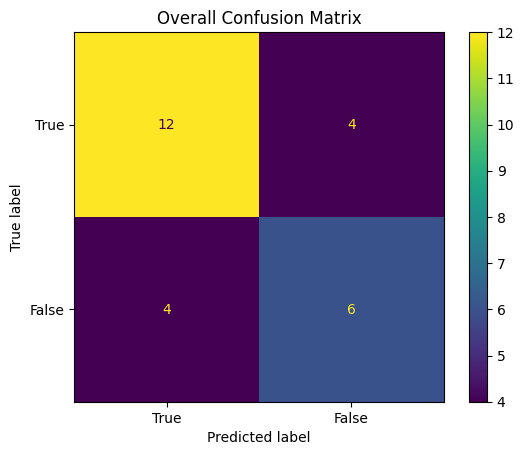

In [35]:
# Calculate and plot the overall confusion matrix
overall_cm = confusion_matrix(y_list, binary_list)
ConfusionMatrixDisplay(overall_cm, display_labels=['True', "False"]).plot()
plt.title('Overall Confusion Matrix')

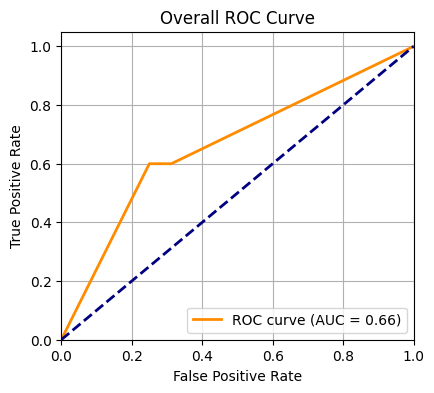

In [36]:
# Calculate and plot the overall ROC curve and AUC
fpr, tpr, _ = roc_curve(y_list, probs_list)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Overall ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)


# -------------------------------------------- Draft ------------------------------------------------------ #

## Test: CV-KFold (futuro)

In [ ]:
# Define the number of epochs
N_EPOCHS=100
RANDOM_SEED=759
N_SAMPLES=10 # number of rowKFolds in each validation fold

# Initialize lists to store predicted probabilities and binary predictions
probs_preds_list = []
binary_preds_list = []

# Initialize lists to store training history metrics for plotting
loss_list = []
accuracy_list = []
precision_list = []
recall_list = []
y_list = []

# Define the feature and label datasets
X = X_scaled
y = y

# Perform LOOCV
# loo = LeaveOneOut()

# Calculate the number of splits based on the number of rows
N_SPLITS = len(X) // N_SAMPLES

# Create the KFold cross-validator
kf = KFold(n_splits=N_SPLITS, shuffle=True, random_state=RANDOM_SEED)


In [ ]:
for train_index, test_index in kf.split(X): # loo.split(X)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Instantiate the model
    model = mlp_model()
    
    # Fit the model on the training data
    history = model.fit(X_train, y_train, epochs=N_EPOCHS, callbacks=[early_stopping], verbose=1)
    # usar validation_data aqui no fit msm ????
    
    # Evaluate the model on the test data and store predictions
    y_probs = model.predict(X_test)
    y_pred_binary = (y_probs > 0.5).astype(int)
    
    y_list.append(y_test.values[0][0])

    # Store predicted probabilities and binary predictions for this fold
    probs_preds_list.append(y_probs)
    binary_preds_list.append(y_pred_binary)

    # Store the training history metrics for this fold
    loss_list.append(history.history['loss'])
    accuracy_list.append(history.history['accuracy'])
    recall_list.append(history.history['recall'])
    precision_list.append(history.history['precision'])
    
   # 'val_accuracy', 'val_loss' 


In [ ]:
# ta errado, só faz sentido calcular a média da amostra de validação

# Convert the lists to NumPy arrays
probs_array = np.concatenate(probs_list)
binary_preds_array = np.concatenate(binary_preds_list)
loss_array = np.concatenate(loss_list)
accuracy_array = np.concatenate(accuracy_list)
precision_array = np.concatenate(precision_list)
recall_array = np.concatenate(recall_list)
f1_array = np.concatenate(f1_list)

# Calculate and print the overall metrics after LOOCV
overall_accuracy = accuracy_score(y, binary_preds_array)
overall_precision = precision_score(y, binary_preds_array)
overall_recall = recall_score(y, binary_preds_array)
overall_f1 = f1_score(y, binary_preds_array)

print(f'Overall Accuracy: {overall_accuracy:.2f}')
print(f'Overall Precision: {overall_precision:.2f}')
print(f'Overall Recall: {overall_recall:.2f}')
print(f'Overall F1 Score: {overall_f1:.2f}')



In [ ]:
# Calculate and plot the overall confusion matrix
overall_cm = confusion_matrix(y, binary_preds_array)
ConfusionMatrixDisplay(overall_cm, display_labels=['Class 0', 'Class 1']).plot()
plt.title('Overall Confusion Matrix')

In [ ]:
# Calculate and plot the overall ROC curve and AUC
fpr, tpr, _ = roc_curve(y, probs_array)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Overall ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)


In [ ]:
# Plot the training history for all folds in the same plot
# plt.subplot(1, 2, 2)

rcParams['figure.figsize'] = (15, 8)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

for i, loss in enumerate(loss_list):
    plt.plot(loss, label=f'Fold {i + 1} Loss', linestyle='--')
    plt.plot(accuracy_list[i], label=f'Fold {i + 1} Accuracy', linestyle='-')
    plt.plot(precision_list[i], label=f'Fold {i + 1} Precision', linestyle='-.')
    plt.plot(recall_list[i], label=f'Fold {i + 1} Recall', linestyle=':')


plt.title('Training Metrics')
plt.xlabel('Epochs')
plt.ylabel('Metrics')
# plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# --------------------------------------------- Draft ------------------------------------------------- #